# <center> Credit Risk Model </center>

## Data Preparation

### Import Libraries

Import all the libraries important to build the model here

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt    
import seaborn as sns  
 

### Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan_data_backup = pd.read_csv(r'F:\Learning\CreditRiskModelingInPython\loan_data_2007_2014.csv', low_memory=False)

#### Check the shape of the Data Frame

In [3]:
print("The shape of the dataframe loan data backup is :\t",loan_data_backup.shape)

The shape of the dataframe loan data backup is :	 (466285, 75)


So we have 466285 rows and 75 columns 

#### Check out all the columns in this dataset

In [4]:
loan_data_backup.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

#### First five rows of this dataset

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
loan_data_backup.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

### Copy this dataframe to new dataframe

We will use the working data frame and keep loan_data_backup for backup incase we need it later

In [7]:
loan_data = loan_data_backup.copy()

#### Check the shape of the new working dataframe Loan_data

In [8]:
print("The shape of the dataframe loan_data is\t", loan_data.shape)

The shape of the dataframe loan_data is	 (466285, 75)


### Explore Data

In [9]:
pd.set_option("display.max_rows", None)

In [10]:
loan_data.sample(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
172790      172790   3098466    3771039      25000        25000   
375448      375448  17954747   20107251      16200        16200   
406998      406998  14638654   16700994       4850         4850   
450107      450107  11395429   13317604       8400         8400   
319005      319005  25256965   27709770       6000         6000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
172790          25000.0   36 months     10.16       808.56     B        B1   
375448          16200.0   36 months      6.49       496.45     A        A2   
406998           4850.0   36 months     19.47       178.94     D        D5   
450107           8400.0   36 months      9.67       269.75     B        B1   
319005           6000.0   36 months     11.67       198.35     B        B4   

                               emp_title emp_length home_ownership  \
172790          Accurate Background, Inc    2 years       MORTGAGE   
375448                  Treasury Analyst    6 years       MORTGAGE   
406998                   sales associate    2 years           RENT   
450107  Retired teacher/Per Diem Teacher  10+ years           RENT   
319005             Collection Specialist    3 years            OWN   

        annual_inc verification_status issue_d loan_status pymnt_plan  \
172790     97000.0            Verified  Jan-13  Fully Paid          n   
375448    120000.0     Source Verified  Jun-14     Current          n   
406998     13534.0            Verified  Apr-14     Current          n   
450107     45000.0        Not Verified  Jan-14     Current          n   
319005     28000.0     Source Verified  Aug-14     Current          n   

                                                      url desc  \
172790  https://www.lendingclub.com/browse/loanDetail....  NaN   
375448  https://www.lendingclub.com/browse/loanDetail....  NaN   
406998  https://www.lendingclub.com/browse/loanDetail....  NaN   
450107  https://www.lendingclub.com/browse/loanDetail....  NaN   
319005  https://www.lendingclub.com/browse/loanDetail....  NaN   

                   purpose                    title zip_code addr_state  \
172790         credit_card  Credit Card Refinancing    923xx         CA   
375448  debt_consolidation       Debt consolidation    988xx         WA   
406998      major_purchase           Major purchase    207xx         MD   
450107               other                    Other    112xx         NY   
319005  debt_consolidation       Debt consolidation    272xx         NC   

          dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
172790  11.64          0.0           Jul-02             1.0   
375448  23.83          0.0           Oct-00             1.0   
406998  34.25          0.0           Nov-95             0.0   
450107   3.65          0.0           Nov-97             0.0   
319005   9.90          0.0           Nov-93             0.0   

        mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
172790                     NaN                     NaN      12.0      0.0   
375448                    39.0                     NaN      21.0      0.0   
406998                    43.0                     NaN       5.0      0.0   
450107                     NaN                    99.0       7.0      1.0   
319005                     NaN                    44.0      10.0      1.0   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
172790      20239        86.1       31.0                   w       0.00   
375448      16438        49.1       42.0                   w    8042.19   
406998       9081        56.8       18.0                   f    2365.39   
450107       4502        14.9       13.0                   w    3316.47   
319005       4753        57.3       33.0                   f    3588.97   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
172790           0.00     27487.51         27487.51         250

#### Dataset columns

In [11]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

#### Dataset information

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [13]:
# Get data types of columns
data_types = loan_data.dtypes
# Count the occurrences of each data type
data_type_counts = data_types.value_counts()
# Print the result
print("The total count of datatypes are :\n", data_type_counts)

The total count of datatypes are :
 float64    46
object     22
int64       7
Name: count, dtype: int64


### General Preprocessing

#### Preprocessing continuous variables

##### emp_length

In [14]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

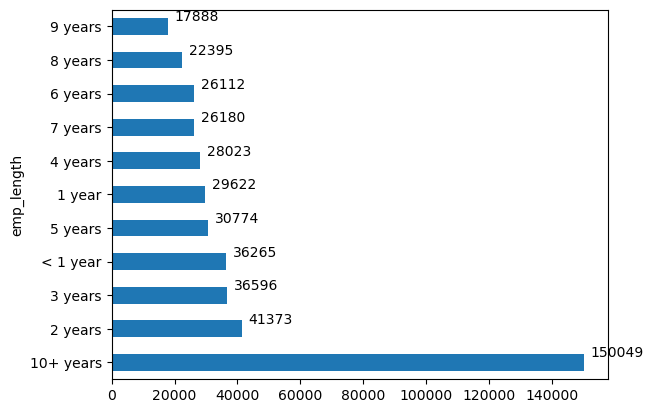

In [15]:
# Perhaps it is better if we can use value_count for this to know the distribution

ax = loan_data['emp_length'].value_counts().plot(kind = 'barh')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

# Show the plot
plt.show()

* We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,<br>
* We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’<br>
* replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.<br>
* Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.<br>
* Finally, we replace the string ‘space year’ with nothing.<br>

In [16]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')



Let us see the how many missing values we have

In [17]:
print(round(loan_data['emp_length_int'].isnull().sum()/len(loan_data) * 100,2),"% data missing in emp_lenght_int column which is", loan_data['emp_length_int'].isnull().sum(),"out of ", len(loan_data), "missing")

4.51 % data missing in emp_lenght_int column which is 21008 out of  466285 missing


We can see there is still nan in the data. Need to do something about it. I will assign 0 to it.

In [18]:
loan_data['emp_length_int'].fillna(str(0), inplace=True)

In [19]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [20]:
loan_data['emp_length_int'].unique()
# Displays unique values of a column.

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7'],
      dtype=object)

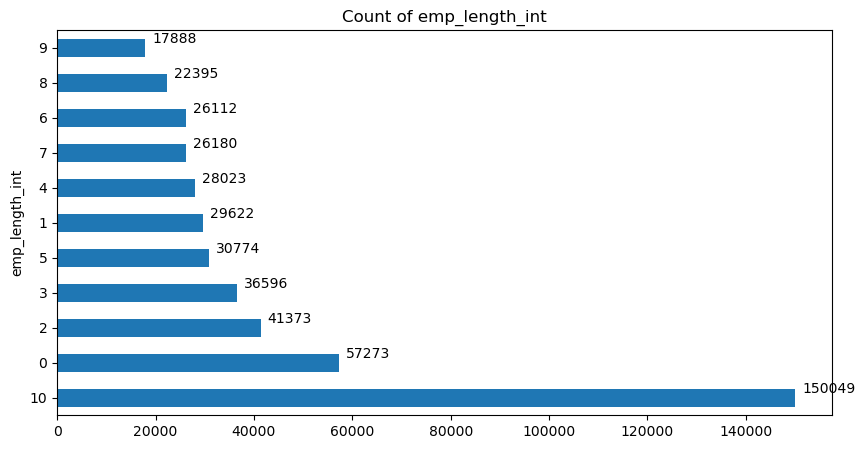

In [21]:
# Perhaps it is better if we can use value_count for this to know the distribution

ax = loan_data['emp_length_int'].value_counts().plot(kind = 'barh', figsize=(10,5))

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')
# Title of plot
plt.title("Count of emp_length_int")
# Show the plot
plt.show()

We will check the datatype of new column and change it to integer if required

In [22]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

str

Since this is string we will convert it to integer

In [23]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
# Transforms the values to numeric.

In [24]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

##### earliest_cr_line

In [25]:
loan_data['earliest_cr_line'].value_counts()
# Displays a column.

earliest_cr_line
Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
Nov-99    3323
Nov-00    3267
Sep-00    3256
Sep-99    3130
Aug-99    3126
Sep-01    3061
Oct-02    3016
Dec-99    2968
Dec-00    2951
Nov-98    2899
Dec-98    2883
Oct-98    2862
Aug-02    2851
Sep-02    2846
Jul-00    2835
May-01    2819
Jul-01    2798
Jan-01    2797
Nov-01    2797
Sep-98    2782
May-00    2778
Mar-01    2757
Mar-00    2732
Dec-01    2726
Jun-01    2718
Jan-00    2685
Jun-00    2664
Feb-00    2644
Oct-03    2610
Sep-03    2580
Aug-98    2580
Apr-01    2544
Jul-99    2533
Mar-99    2501
Dec-97    2463
Apr-00    2456
Oct-97    2442
Jul-02    2435
Feb-01    2432
Jan-02    2419
Jun-99    2413
Nov-97    2404
May-99    2386
Aug-03    2347
Nov-96    2325
Nov-02    2319
Jan-99    2311
May-02    2295
Feb-99    2267
Oct-96    2246
Mar-02    2237
Jul-03    2232
Sep-97    2230
Sep-04    2200
Feb-02    2158
Apr-02    2157
Sep-95    2156
Oct-95    2145
Jul-98    2143
Nov-03    2136
Dec-02  

Extracts the date and the time from a string variable that is in a given format.

In [26]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.

Check the sample

In [27]:
loan_data['earliest_cr_line_date'].sample(5)

57582    1980-04-01
453569   2000-10-01
218432   1990-01-01
55600    1996-08-01
338916   1992-05-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

Checkout of the datatype of single element of a column

In [28]:
type(loan_data['earliest_cr_line_date'][0])
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

Any date which is greater then 2017-12-01 is incorrect and so we should replace the first two digitis of the year from 20 to 19

In [29]:
# Any date which is greater then 2017-12-01 is incorrect and so we should replace the first two digitis of the year from 20 to 19

loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line_date'].apply(lambda x: x.replace(year=x.year - 100) if x.year > 2017 else x)

In [30]:
"""
# Assume we are now in December 2017
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

Since np.timedelta64 do not support M anymore we have to do it differently
"""

"\n# Assume we are now in December 2017\nloan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))\n# We calculate the difference between two dates in months, turn it to numeric datatype and round it.\n# We save the result in a new variable.\n\nSince np.timedelta64 do not support M anymore we have to do it differently\n"

Calculate the month difference from 2017-12-01

In [31]:
from dateutil.relativedelta import relativedelta

def calculate_months_difference(x):
    try:
        diff = relativedelta(pd.to_datetime('2017-12-01'), x)
        months_diff = diff.years * 12 + diff.months
        return months_diff
    except Exception as e:
        return None  # Handle cases where the date conversion or calculation fails

# Assuming you have a DataFrame with a column 'earliest_cr_line_date' containing datetime values
loan_data['mths_since_earliest_cr_line'] = loan_data['earliest_cr_line_date'].apply(calculate_months_difference)

# Option 1:
# Drop rows where the calculation failed (result is None)

loan_data = loan_data.dropna(subset=['mths_since_earliest_cr_line'])

# Option 2:
# We can also fill something there to check further
#loan_data['mths_since_earliest_cr_line'].fillna(pd.to_datetime('1900-01-01'), inplace = True)

# Round the result if needed
loan_data['mths_since_earliest_cr_line'] = loan_data['mths_since_earliest_cr_line'].round()

In [32]:
loan_data['mths_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

##### Term

In [33]:
loan_data['term'].describe()

count         466256
unique             2
top        36 months
freq          337924
Name: term, dtype: object

Check the unique values in variable term

In [34]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Replace the Month with space

In [35]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))

Check unique values after replace

In [36]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

Checks the datatype of a single element of a column

In [37]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

##### issue_d

Check few samples

In [38]:
loan_data['issue_d'].sample(5)

205344    Aug-12
198274    Sep-12
437656    Feb-14
11181     Jul-11
464067    Jan-14
Name: issue_d, dtype: object

Assume we are now in December 2017

In [39]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')


In [40]:
loan_data['issue_d_date'].sample(5)

449193   2014-02-01
462009   2014-01-01
199128   2012-09-01
302937   2014-10-01
137001   2013-05-01
Name: issue_d_date, dtype: datetime64[ns]

Calculate the month difference

In [41]:
def calculate_months_difference(x):
    try:
        diff = relativedelta(pd.to_datetime('2017-12-01'), x)
        months_diff = diff.years * 12 + diff.months
        return months_diff
    except Exception as e:
        return None  # Handle cases where the date conversion or calculation fails

# Assuming you have a DataFrame with a column 'earliest_cr_line_date' containing datetime values
loan_data['mths_since_issue_d'] = loan_data['issue_d_date'].apply(calculate_months_difference)

# Drop rows where the calculation failed (result is None)
loan_data = loan_data.dropna(subset=['mths_since_issue_d'])

# Round the result if needed
loan_data['mths_since_issue_d'] = loan_data['mths_since_issue_d'].round()

In [42]:
"""
# # Extracts the date and the time from a string variable that is in a given format.
# loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# # We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# # We save the result in a new variable.
# loan_data['mths_since_issue_d'].describe()
# # Shows some descriptive statisics for the values of a column."""

"\n# # Extracts the date and the time from a string variable that is in a given format.\n# loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))\n# # We calculate the difference between two dates in months, turn it to numeric datatype and round it.\n# # We save the result in a new variable.\n# loan_data['mths_since_issue_d'].describe()\n# # Shows some descriptive statisics for the values of a column."

In [44]:
# We save the result in a new variable.
loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466256.000000
mean         51.250564
std          14.328612
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [45]:
loan_data.loc[:,['issue_d','issue_d_date','mths_since_issue_d']].sample(10)

issue_d issue_d_date  mths_since_issue_d
431492  Mar-14   2014-03-01                  45
337989  Jul-14   2014-07-01                  41
205897  Aug-12   2012-08-01                  64
19182   Feb-11   2011-02-01                  82
153750  Apr-13   2013-04-01                  56
163866  Feb-13   2013-02-01                  58
400459  May-14   2014-05-01                  43
309275  Sep-14   2014-09-01                  39
345156  Jul-14   2014-07-01                  41
424476  Mar-14   2014-03-01                  45

#### Preprocessing few discrete variables

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, we are not going to use sub_grade, as it overlaps with grade.

In [46]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [47]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [48]:
type(loan_data_dummies)
# Returns the type of the variable.

pandas.core.frame.DataFrame

In [49]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

In [50]:
loan_data.shape

(466256, 207)

In [51]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

#### Working with Missing Values

In [52]:
pd.set_option('display.max_rows', None)
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27576
emp_length                                                          21008
home_ownership                        

In [53]:
pd.set_option('display.max_rows', 100)

In [54]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [55]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [59]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

## PD model

### Data preparation

#### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [61]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1962
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       758
Name: count, dtype: int64

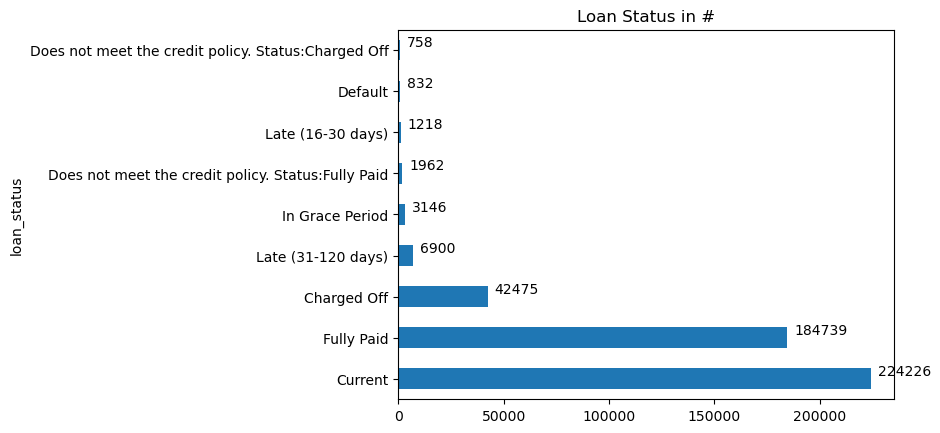

In [62]:
ax = loan_data['loan_status'].value_counts().plot(kind='barh')

for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

# Show the plot
plt.title("Loan Status in #")
plt.show()
    

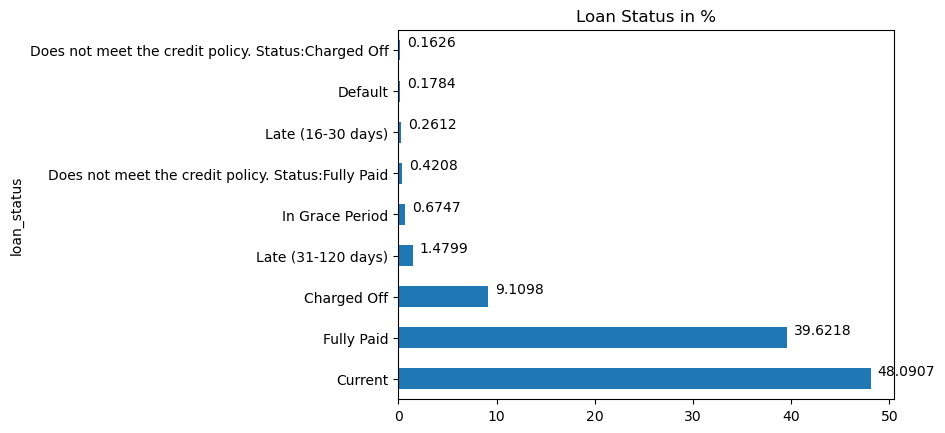

In [63]:
ax = (round(loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()*100, 4)).plot(kind = 'barh')
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.
for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

# Show the plot
plt.title("Loan Status in %")
plt.show()

In [64]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

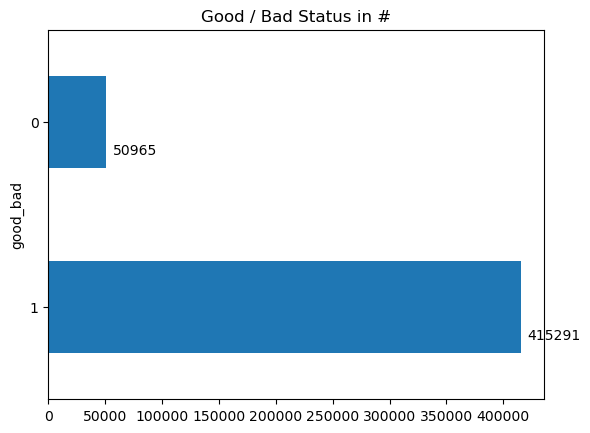

In [65]:
ax = loan_data['good_bad'].value_counts().plot(kind='barh')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')
    
plt.title("Good / Bad Status in #")
plt.show()
    

We have selected `Good` as `1` and `bad` as `0`

#### Splitting Data

In [66]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size=0.2, random_state=42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [68]:
print("The rows and columns of X_train :\t", X_train.shape)
print("The rows and columns of X_test :\t", X_test.shape)
print("The rows and columns of y_train:\t", y_train.shape)
print("The rows and columns of y_test: \t", y_test.shape)

The rows and columns of X_train :	 (373004, 207)
The rows and columns of X_test :	 (93252, 207)
The rows and columns of y_train:	 (373004,)
The rows and columns of y_test: 	 (93252,)


#### Data Preparation for Train set

In [79]:
#####
df_inputs_prepr = X_train
df_targets_prepr = y_train

In [80]:
df_inputs_prepr['grade'].unique()

array(['B', 'D', 'F', 'A', 'C', 'E', 'G'], dtype=object)

In [74]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [81]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2644   0.729955    0.007088    1930.0    714.0     0.005810   
1     F   10565   0.759016    0.028324    8019.0   2546.0     0.024140   
2     E   28753   0.804507    0.077085   23132.0   5621.0     0.069637   
3     D   61537   0.845199    0.164977   52011.0   9526.0     0.156574   
4     C  100106   0.885222    0.268378   88616.0  11490.0     0.266770   
5     B  109526   0.921224    0.293632  100898.0   8628.0     0.303744   
6     A   59873   0.961619    0.160516   57575.0   2298.0     0.173324   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017490 -1.102042             NaN       NaN  0.292094  
1    0.062367 -0.949144        0.029061  0.152898  0.292094  
2    0.137692 -0.681727        0.045492  0.267417  0.292094  
3    0.233349 -0.399004        0.040691  0.282723  0.292094  
4    0.281459 -0.053599        0.040023  0.345405  0.292094  
5    0.211351  0.362663        0.036003  0.416262  0.292094  
6    0.056292  1.124615        0.040395  0.761952  0.292094

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [83]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title('Weight of Evidence by ' + df_WoE.columns[0])
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    
    for i, j in zip(x, y):
        plt.annotate(f'{j:.2f}', (i, j), textcoords='offset points', xytext=(0, 10), ha='center')
    # put the values of weight of evidence against each data coordinates
    
    plt.xticks(rotation=rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.show()

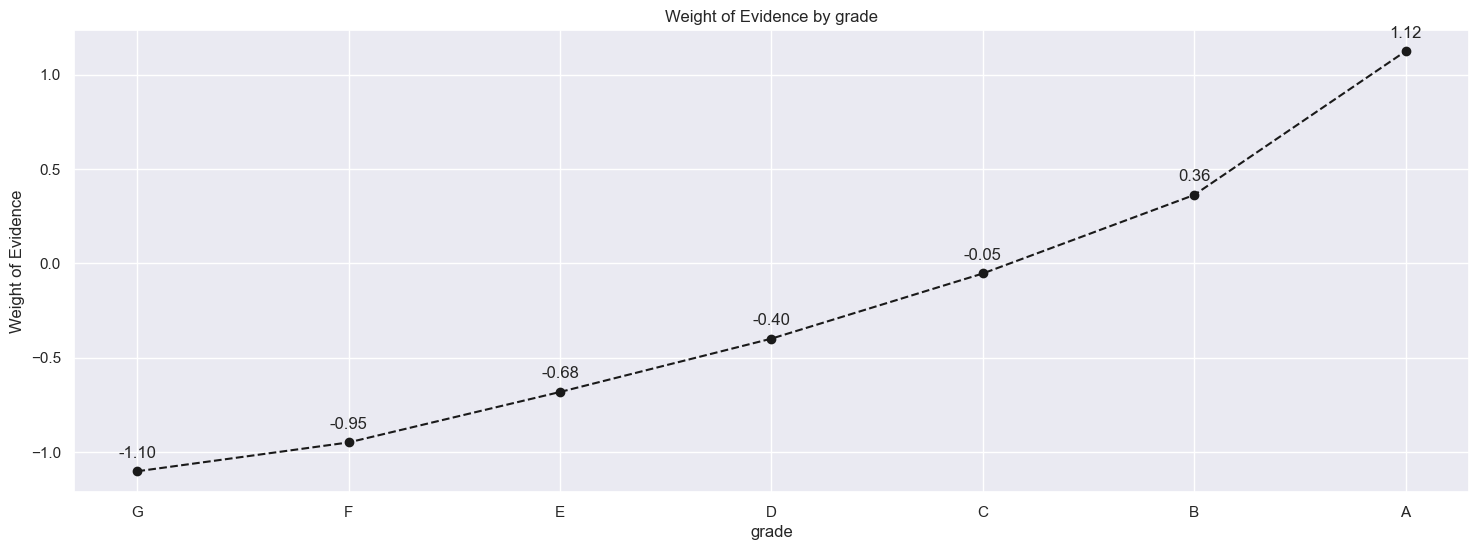

In [84]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

In [98]:
# Sort the DataFrame by the 'WoE' column in ascending order
df_sorted = df_temp.sort_values(by='WoE')

# Select the first row (minimum WoE)
min_WoE_row = df_sorted.iloc[0]

# Get the 'grade' value with the minimum WoE
min_WoE_grade = min_WoE_row['grade']

print("Grade with Minimum WoE:", "'grade:"+min_WoE_grade+"'")

Grade with Minimum WoE: 'grade:G'


In [102]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     137   0.788321    0.000367     108.0     29.0   
1           NONE      36   0.861111    0.000097      31.0      5.0   
2           RENT  150709   0.873644    0.404041  131666.0  19043.0   
3            OWN   33338   0.890455    0.089377   29686.0   3652.0   
4       MORTGAGE  188784   0.904155    0.506118  170690.0  18094.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.000325    0.000710 -0.781599             NaN       NaN  0.022167  
1     0.000093    0.000122 -0.271885        0.072790  0.509714  0.022167  
2     0.396368    0.466477 -0.162866        0.012533  0.109020  0.022167  
3     0.089367    0.089459 -0.001034        0.016811  0.161832  0.022167  
4     0.513846    0.443231  0.147834        0.013700  0.148868  0.022167

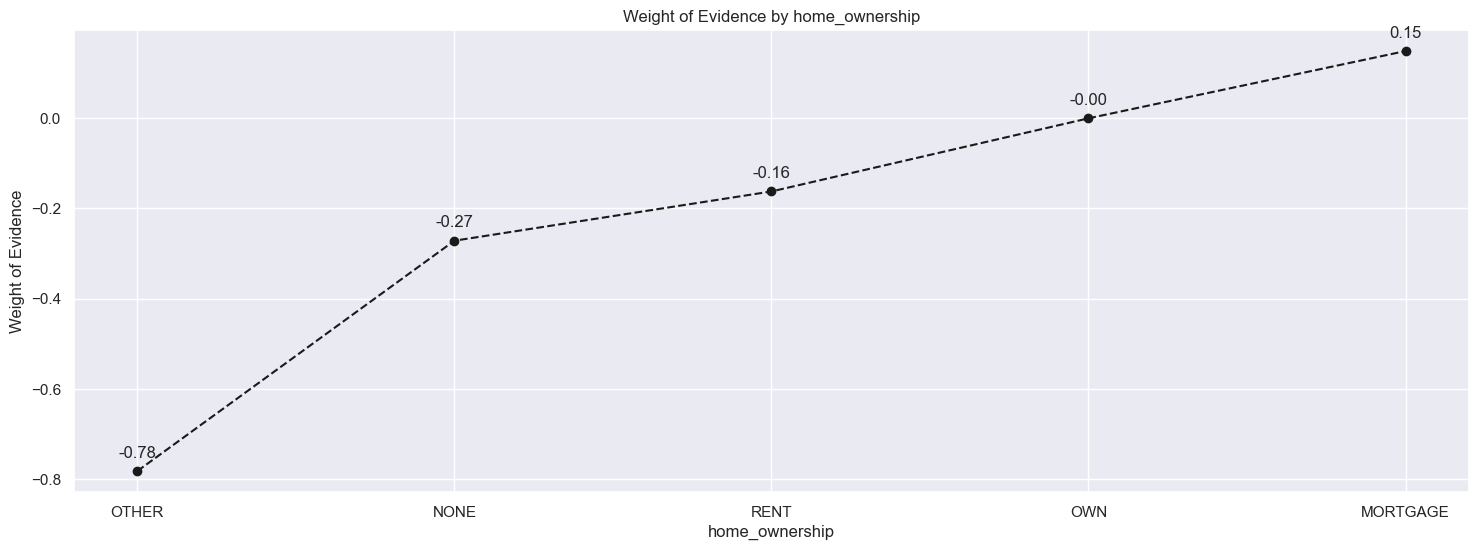

In [103]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [104]:
# Sort the DataFrame by the 'WoE' column in ascending order
df_sorted = df_temp.sort_values(by='WoE')

# Select the first row (minimum WoE)
min_WoE_row = df_sorted.iloc[0]

# Get the 'grade' value with the minimum WoE
min_WoE_grade = min_WoE_row['home_ownership']

print("Grade with Minimum WoE:", "'home_ownership:"+min_WoE_grade+"'")

Grade with Minimum WoE: 'home_ownership:OTHER'


In [105]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.

df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

In [106]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()


array(['TX', 'VA', 'AZ', 'NJ', 'IL', 'RI', 'NY', 'PA', 'OH', 'CA', 'WI',
       'AR', 'MN', 'UT', 'LA', 'OK', 'FL', 'HI', 'AL', 'IN', 'NC', 'MA',
       'KY', 'KS', 'NV', 'MI', 'OR', 'SC', 'CT', 'TN', 'GA', 'MO', 'VT',
       'WA', 'WV', 'CO', 'MD', 'AK', 'NM', 'MT', 'DC', 'NH', 'MS', 'DE',
       'SD', 'WY', 'IA', 'ID', 'NE', 'ME'], dtype=object)

In [107]:
print("The total unique states are:\t", len(df_inputs_prepr['addr_state'].unique()))

The total unique states are:	 50


In [108]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     12   0.500000    0.000032      6.0     6.0     0.000018   
1          IA     13   0.769231    0.000035     10.0     3.0     0.000030   
2          NV   5203   0.862387    0.013949   4487.0   716.0     0.013508   
3          HI   1987   0.869653    0.005327   1728.0   259.0     0.005202   
4          FL  25358   0.874872    0.067983  22185.0  3173.0     0.066786   
5          AL   4747   0.875922    0.012726   4158.0   589.0     0.012517   
6          NM   2071   0.879285    0.005552   1821.0   250.0     0.005482   
7          LA   4355   0.882893    0.011675   3845.0   510.0     0.011575   
8          NY  32111   0.883031    0.086088  28355.0  3756.0     0.085360   
9          OK   3261   0.884085    0.008743   2883.0   378.0     0.008679   
10         NC  10184   0.884623    0.027303   9009.0  1175.0     0.027121   
11         MD   8784   0.884677    0.023549   7771.0  1013.0     0.023394   
12         SD    792   0.885101    0.002123    701.0    91.0     0.002110   
13         VA  11440   0.885227    0.030670  10127.0  1313.0     0.030486   
14         NJ  14309   0.885527    0.038362  12671.0  1638.0     0.038145   
15         MO   6036   0.886017    0.016182   5348.0   688.0     0.016100   
16         AZ   8620   0.886195    0.023110   7639.0   981.0     0.022996   
17         CA  57214   0.886234    0.153387  50705.0  6509.0     0.152643   
18         TN   4753   0.887440    0.012742   4218.0   535.0     0.012698   
19         AR   2810   0.888256    0.007533   2496.0   314.0     0.007514   
20         RI   1640   0.888415    0.004397   1457.0   183.0     0.004386   
21         PA  13152   0.889066    0.035260  11693.0  1459.0     0.035201   
22         UT   2748   0.889374    0.007367   2444.0   304.0     0.007357   
23         MN   6588   0.890103    0.017662   5864.0   724.0     0.017653   
24         KY   3575   0.890350    0.009584   3183.0   392.0     0.009582   
25         MI   9269   0.891143    0.024850   8260.0  1009.0     0.024866   
26         OH  12170   0.892276    0.032627  10859.0  1311.0     0.032690   
27         GA  11937   0.894111    0.032002  10673.0  1264.0     0.032130   
28         IN   5237   0.894787    0.014040   4686.0   551.0     0.014107   
29         MA   8807   0.895424    0.023611   7886.0   921.0     0.023740   
30         OR   4780   0.895607    0.012815   4281.0   499.0     0.012888   
31         WA   8423   0.896474    0.022582   7551.0   872.0     0.022732   
32         DE   1025   0.900488    0.002748    923.0   102.0     0.002779   
33         WI   4702   0.900681    0.012606   4235.0   467.0     0.012749   
34         TX  29234   0.905692    0.078374  26477.0  2757.0     0.079707   
35         CT   5695   0.905882    0.015268   5159.0   536.0     0.015531   
36         IL  14872   0.906401    0.039871  13480.0  1392.0     0.040580   
37         MT   1135   0.906608    0.003043   1029.0   106.0     0.003098   
38         SC   4437   0.906919    0.011895   4024.0   413.0     0.012114   
39         CO   7771   0.910436    0.020834   7075.0   696.0     0.021299   
40         KS   3352   0.911098    0.008986   3054.0   298.0     0.009194   
41         AK   1026   0.911306    0.002751    935.0    91.0     0.002815   
42         VT    713   0.913043    0.001912    651.0    62.0     0.001960   
43         MS    967   0.914168    0.002592    884.0    83.0     0.002661   
44         WV   1890   0.918519    0.005067   1736.0   154.0     0.005226   
45         NH   1774   0.922210    0.004756   1636.0   138.0     0.004925   
46         DC   1115   0.929148    0.002989   1036.0    79.0     0.003119   
47         WY    898   0.929844    0.002407    835.0    63.0     0.002514   
48         ME      3   1.000000    0.000008      3.0     0.0     0.000009   
49         ID      9   1.000000    0.000024      9.0     0.0     0.000027   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000147 -2

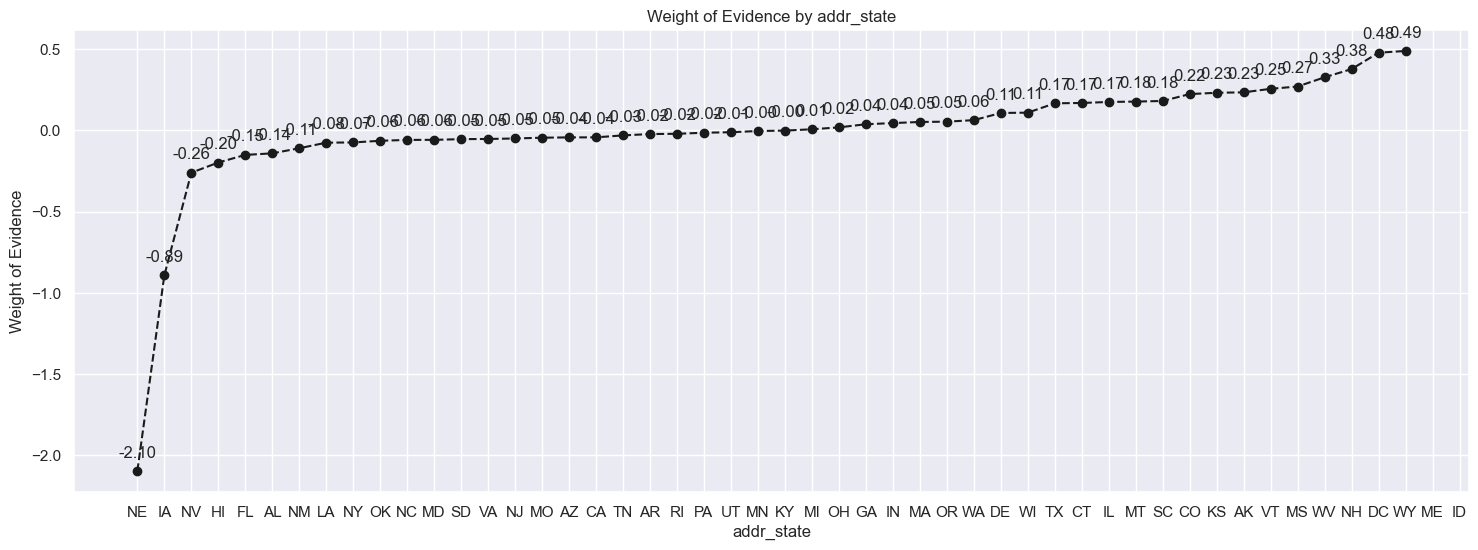

In [109]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [110]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [111]:
df_temp.iloc[2: -2, : ]

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
2          NV   5203   0.862387    0.013949   4487.0   716.0     0.013508   
3          HI   1987   0.869653    0.005327   1728.0   259.0     0.005202   
4          FL  25358   0.874872    0.067983  22185.0  3173.0     0.066786   
5          AL   4747   0.875922    0.012726   4158.0   589.0     0.012517   
6          NM   2071   0.879285    0.005552   1821.0   250.0     0.005482   
7          LA   4355   0.882893    0.011675   3845.0   510.0     0.011575   
8          NY  32111   0.883031    0.086088  28355.0  3756.0     0.085360   
9          OK   3261   0.884085    0.008743   2883.0   378.0     0.008679   
10         NC  10184   0.884623    0.027303   9009.0  1175.0     0.027121   
11         MD   8784   0.884677    0.023549   7771.0  1013.0     0.023394   
12         SD    792   0.885101    0.002123    701.0    91.0     0.002110   
13         VA  11440   0.885227    0.030670  10127.0  1313.0     0.030486   
14         NJ  14309   0.885527    0.038362  12671.0  1638.0     0.038145   
15         MO   6036   0.886017    0.016182   5348.0   688.0     0.016100   
16         AZ   8620   0.886195    0.023110   7639.0   981.0     0.022996   
17         CA  57214   0.886234    0.153387  50705.0  6509.0     0.152643   
18         TN   4753   0.887440    0.012742   4218.0   535.0     0.012698   
19         AR   2810   0.888256    0.007533   2496.0   314.0     0.007514   
20         RI   1640   0.888415    0.004397   1457.0   183.0     0.004386   
21         PA  13152   0.889066    0.035260  11693.0  1459.0     0.035201   
22         UT   2748   0.889374    0.007367   2444.0   304.0     0.007357   
23         MN   6588   0.890103    0.017662   5864.0   724.0     0.017653   
24         KY   3575   0.890350    0.009584   3183.0   392.0     0.009582   
25         MI   9269   0.891143    0.024850   8260.0  1009.0     0.024866   
26         OH  12170   0.892276    0.032627  10859.0  1311.0     0.032690   
27         GA  11937   0.894111    0.032002  10673.0  1264.0     0.032130   
28         IN   5237   0.894787    0.014040   4686.0   551.0     0.014107   
29         MA   8807   0.895424    0.023611   7886.0   921.0     0.023740   
30         OR   4780   0.895607    0.012815   4281.0   499.0     0.012888   
31         WA   8423   0.896474    0.022582   7551.0   872.0     0.022732   
32         DE   1025   0.900488    0.002748    923.0   102.0     0.002779   
33         WI   4702   0.900681    0.012606   4235.0   467.0     0.012749   
34         TX  29234   0.905692    0.078374  26477.0  2757.0     0.079707   
35         CT   5695   0.905882    0.015268   5159.0   536.0     0.015531   
36         IL  14872   0.906401    0.039871  13480.0  1392.0     0.040580   
37         MT   1135   0.906608    0.003043   1029.0   106.0     0.003098   
38         SC   4437   0.906919    0.011895   4024.0   413.0     0.012114   
39         CO   7771   0.910436    0.020834   7075.0   696.0     0.021299   
40         KS   3352   0.911098    0.008986   3054.0   298.0     0.009194   
41         AK   1026   0.911306    0.002751    935.0    91.0     0.002815   
42         VT    713   0.913043    0.001912    651.0    62.0     0.001960   
43         MS    967   0.914168    0.002592    884.0    83.0     0.002661   
44         WV   1890   0.918519    0.005067   1736.0   154.0     0.005226   
45         NH   1774   0.922210    0.004756   1636.0   138.0     0.004925   
46         DC   1115   0.929148    0.002989   1036.0    79.0     0.003119   
47         WY    898   0.929844    0.002407    835.0    63.0     0.002514   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
2     0.017539 -0.261175        0.093156  0.631287  inf  
3     0.006344 -0.198542        0.007266  0.062632  inf  
4     0.077726 -0.151695        0.005219  0.046847  inf  
5     0.014428 -0.142071        0.001050  0.009624  inf  
6     0.006124 -0.110754        0.003364  0.031317  inf  
7     0.012493 -0.076316        0.0

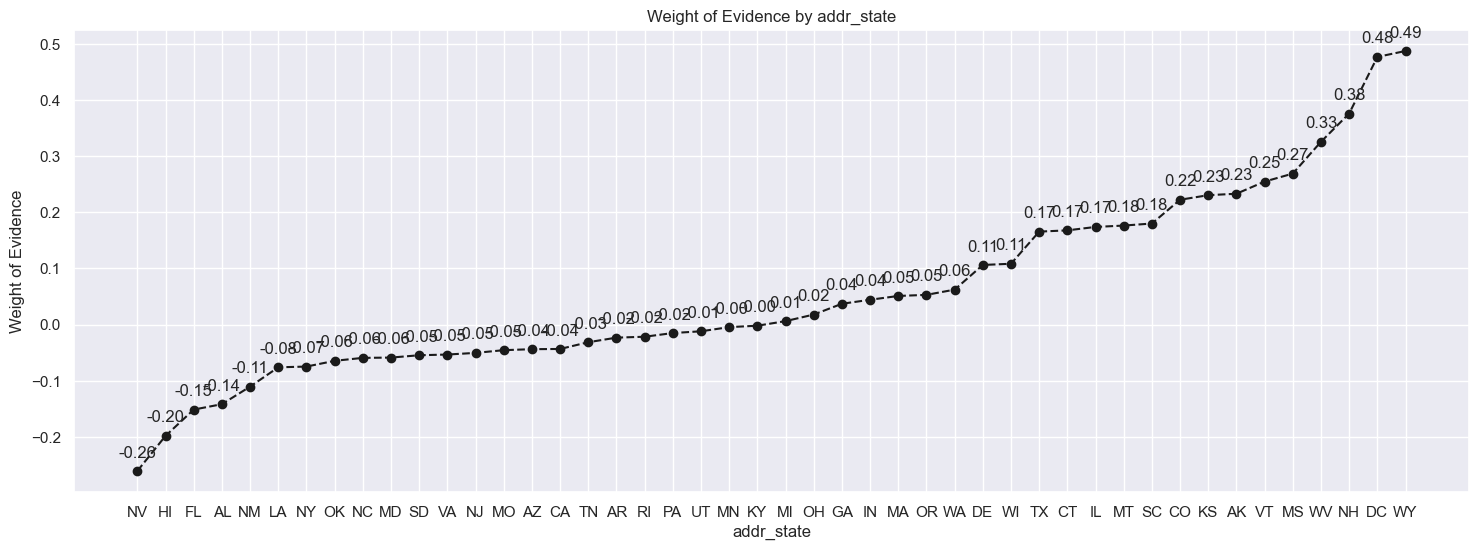

In [112]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

In [113]:
df_temp.iloc[6: -6, : ]

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
6          NM   2071   0.879285    0.005552   1821.0   250.0     0.005482   
7          LA   4355   0.882893    0.011675   3845.0   510.0     0.011575   
8          NY  32111   0.883031    0.086088  28355.0  3756.0     0.085360   
9          OK   3261   0.884085    0.008743   2883.0   378.0     0.008679   
10         NC  10184   0.884623    0.027303   9009.0  1175.0     0.027121   
11         MD   8784   0.884677    0.023549   7771.0  1013.0     0.023394   
12         SD    792   0.885101    0.002123    701.0    91.0     0.002110   
13         VA  11440   0.885227    0.030670  10127.0  1313.0     0.030486   
14         NJ  14309   0.885527    0.038362  12671.0  1638.0     0.038145   
15         MO   6036   0.886017    0.016182   5348.0   688.0     0.016100   
16         AZ   8620   0.886195    0.023110   7639.0   981.0     0.022996   
17         CA  57214   0.886234    0.153387  50705.0  6509.0     0.152643   
18         TN   4753   0.887440    0.012742   4218.0   535.0     0.012698   
19         AR   2810   0.888256    0.007533   2496.0   314.0     0.007514   
20         RI   1640   0.888415    0.004397   1457.0   183.0     0.004386   
21         PA  13152   0.889066    0.035260  11693.0  1459.0     0.035201   
22         UT   2748   0.889374    0.007367   2444.0   304.0     0.007357   
23         MN   6588   0.890103    0.017662   5864.0   724.0     0.017653   
24         KY   3575   0.890350    0.009584   3183.0   392.0     0.009582   
25         MI   9269   0.891143    0.024850   8260.0  1009.0     0.024866   
26         OH  12170   0.892276    0.032627  10859.0  1311.0     0.032690   
27         GA  11937   0.894111    0.032002  10673.0  1264.0     0.032130   
28         IN   5237   0.894787    0.014040   4686.0   551.0     0.014107   
29         MA   8807   0.895424    0.023611   7886.0   921.0     0.023740   
30         OR   4780   0.895607    0.012815   4281.0   499.0     0.012888   
31         WA   8423   0.896474    0.022582   7551.0   872.0     0.022732   
32         DE   1025   0.900488    0.002748    923.0   102.0     0.002779   
33         WI   4702   0.900681    0.012606   4235.0   467.0     0.012749   
34         TX  29234   0.905692    0.078374  26477.0  2757.0     0.079707   
35         CT   5695   0.905882    0.015268   5159.0   536.0     0.015531   
36         IL  14872   0.906401    0.039871  13480.0  1392.0     0.040580   
37         MT   1135   0.906608    0.003043   1029.0   106.0     0.003098   
38         SC   4437   0.906919    0.011895   4024.0   413.0     0.012114   
39         CO   7771   0.910436    0.020834   7075.0   696.0     0.021299   
40         KS   3352   0.911098    0.008986   3054.0   298.0     0.009194   
41         AK   1026   0.911306    0.002751    935.0    91.0     0.002815   
42         VT    713   0.913043    0.001912    651.0    62.0     0.001960   
43         MS    967   0.914168    0.002592    884.0    83.0     0.002661   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
6     0.006124 -0.110754        0.003364  0.031317  inf  
7     0.012493 -0.076316        0.003608  0.034438  inf  
8     0.092007 -0.074986        0.000138  0.001331  inf  
9     0.009259 -0.064742        0.001054  0.010244  inf  
10    0.028783 -0.059478        0.000538  0.005263  inf  
11    0.024814 -0.058952        0.000054  0.000527  inf  
12    0.002229 -0.054786        0.000424  0.004166  inf  
13    0.032163 -0.053544        0.000126  0.001242  inf  
14    0.040124 -0.050594        0.000299  0.002949  inf  
15    0.016853 -0.045745        0.000491  0.004849  inf  
16    0.024031 -0.043985        0.000178  0.001760  inf  
17    0.159444 -0.043596        0.000039  0.000389  inf  
18    0.013105 -0.031585        0.001205  0.012011  inf  
19    0.007692 -0.023383        0.000817  0.008202  inf  
20    0.004483 -0.021786        0.000158  0.001597  inf  
21    0.035740 -0.015195        0.000652  0.006590  inf  
22    0.00744

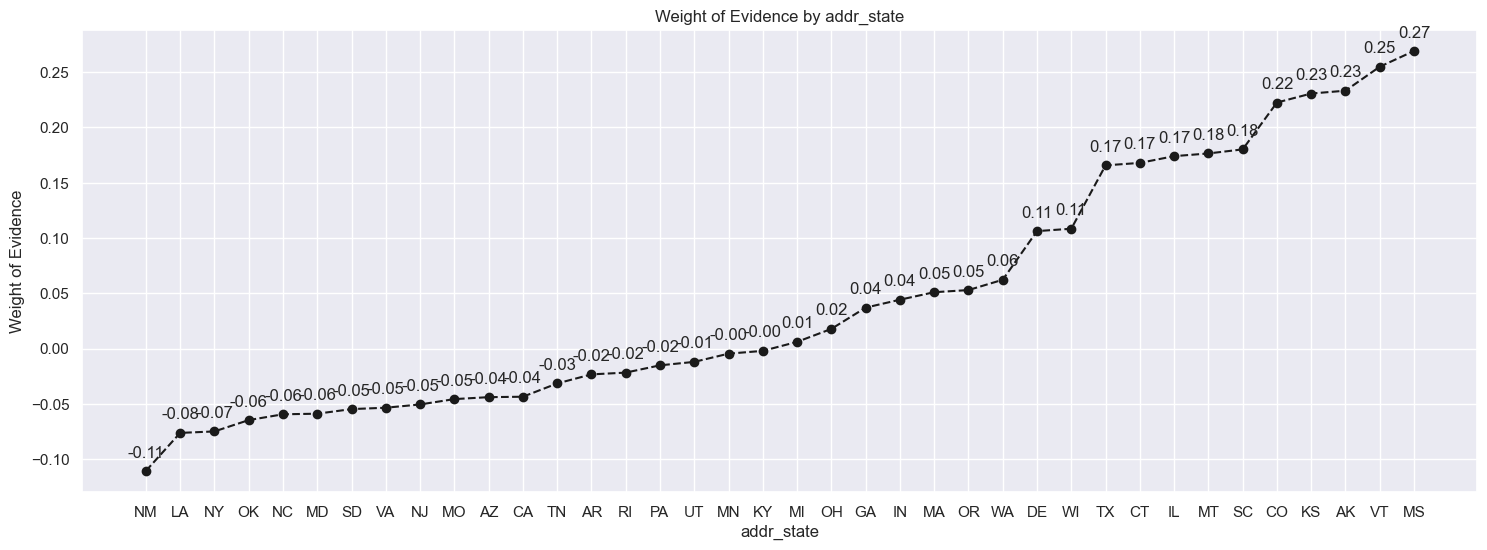

In [114]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [115]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [116]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  134479   0.872605    0.360530  117347.0  17132.0   
1     Source Verified  119926   0.895661    0.321514  107413.0  12513.0   
2        Not Verified  118599   0.905750    0.317956  107421.0  11178.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353262    0.419665 -0.172247             NaN       NaN  0.020585  
1     0.323357    0.306518  0.053479        0.023056  0.225726  0.020585  
2     0.323381    0.273816  0.166374        0.010089  0.112895  0.020585

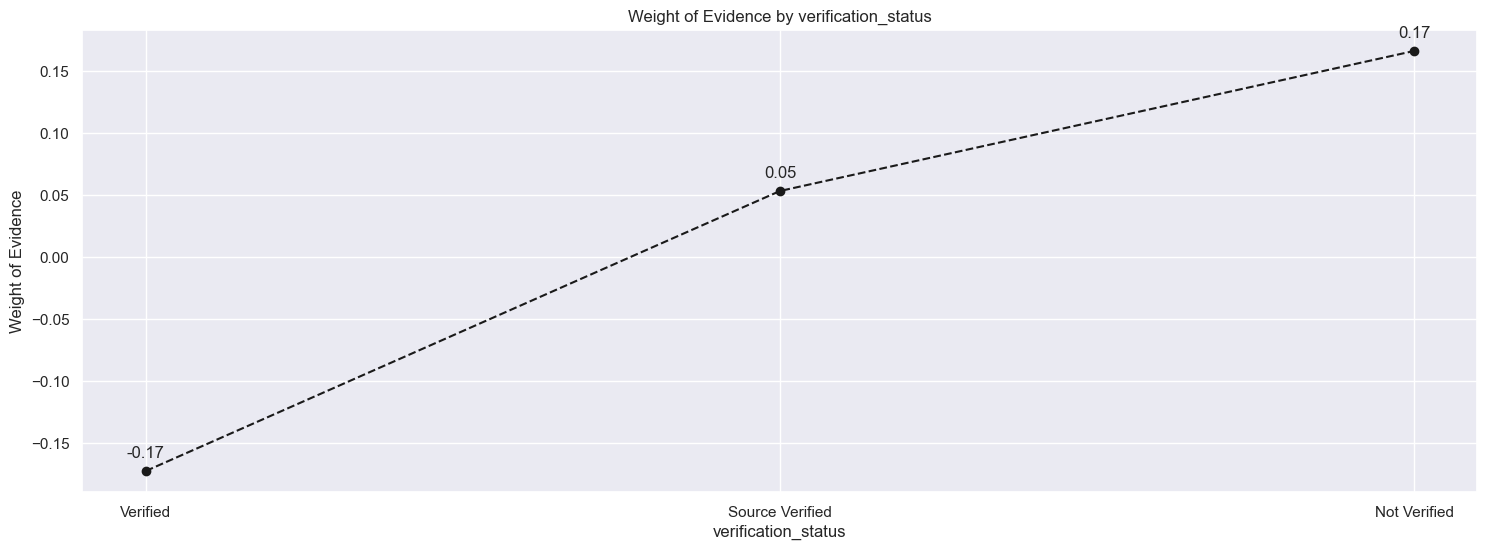

In [117]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [118]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    5617   0.783692    0.015059    4402.0   1215.0   
1          educational     332   0.804217    0.000890     267.0     65.0   
2               moving    2382   0.848866    0.006386    2022.0    360.0   
3     renewable_energy     288   0.850694    0.000772     245.0     43.0   
4                house    1795   0.859610    0.004812    1543.0    252.0   
5                other   18979   0.861584    0.050881   16352.0   2627.0   
6              medical    3679   0.865181    0.009863    3183.0    496.0   
7              wedding    1889   0.878242    0.005064    1659.0    230.0   
8   debt_consolidation  219203   0.886256    0.587669  194270.0  24933.0   
9             vacation    1987   0.886764    0.005327    1762.0    225.0   
10    home_improvement   21258   0.902531    0.056991   19186.0   2072.0   
11      major_purchase    7898   0.904406    0.021174    7143.0    755.0   
12                 car    4313   0.912126    0.011563    3934.0    379.0   
13         credit_card   83384   0.914000    0.223547   76213.0   7171.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.013252    0.029763 -0.809119             NaN       NaN  0.037671  
1      0.000804    0.001592 -0.683573        0.020525  0.125546  0.037671  
2      0.006087    0.008819 -0.370696        0.044650  0.312877  0.037671  
3      0.000738    0.001053 -0.356376        0.001828  0.014320  0.037671  
4      0.004645    0.006173 -0.284380        0.008916  0.071997  0.037671  
5      0.049226    0.064351 -0.267927        0.001974  0.016453  0.037671  
6      0.009582    0.012150 -0.237431        0.003597  0.030496  0.037671  
7      0.004994    0.005634 -0.120543        0.013062  0.116887  0.037671  
8      0.584832    0.610759 -0.043378        0.008014  0.077166  0.037671  
9      0.005304    0.005512 -0.038330        0.000508  0.005048  0.037671  
10     0.057758    0.050756  0.129232        0.015767  0.167562  0.037671  
11     0.021503    0.018494  0.150736        0.001875  0.021504  0.037671  
12     0.011843    0.009284  0.243441        0.007720  0.092705  0.037671  
13     0.229432    0.175661  0.267053        0.001874  0.023611  0.037671

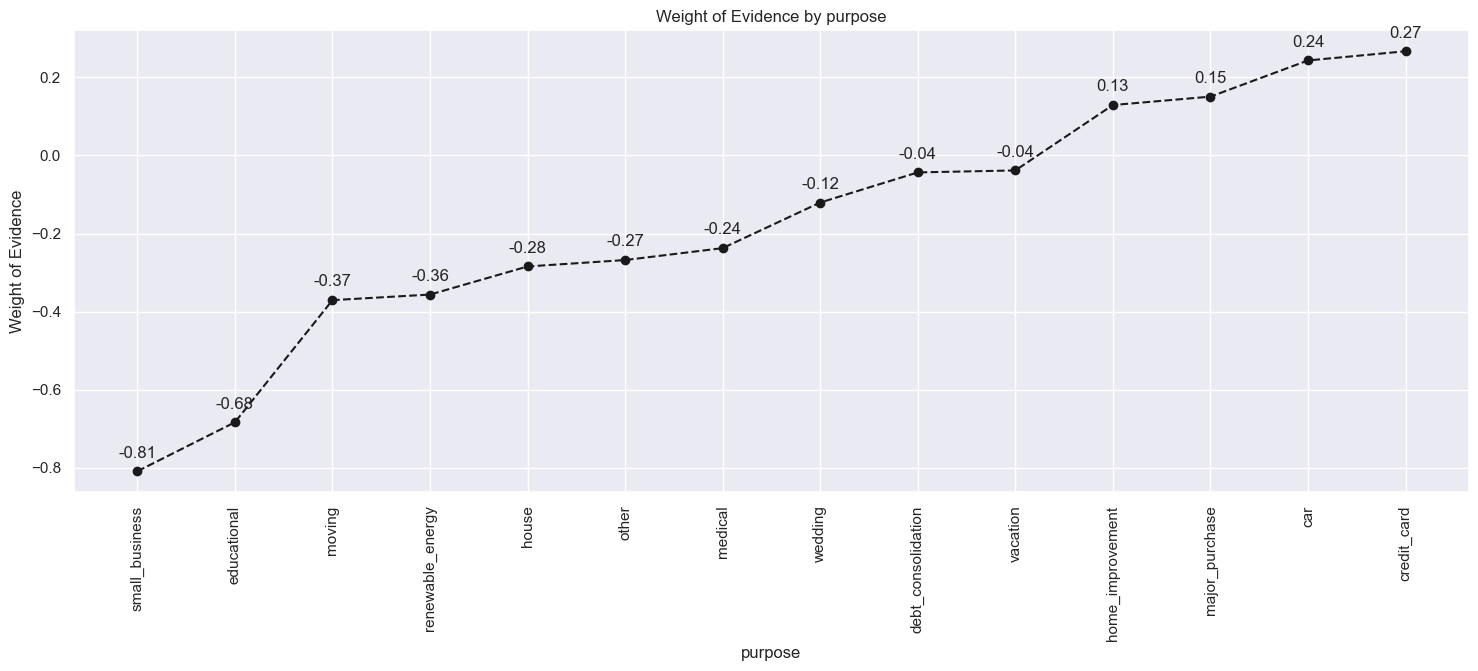

In [120]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [121]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [122]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  242536   0.879577    0.650224  213329.0  29207.0   
1                   w  130468   0.910967    0.349776  118852.0  11616.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.642207    0.715455 -0.108007             NaN       NaN  0.024689  
1     0.357793    0.284545  0.229061         0.03139  0.337068  0.024689

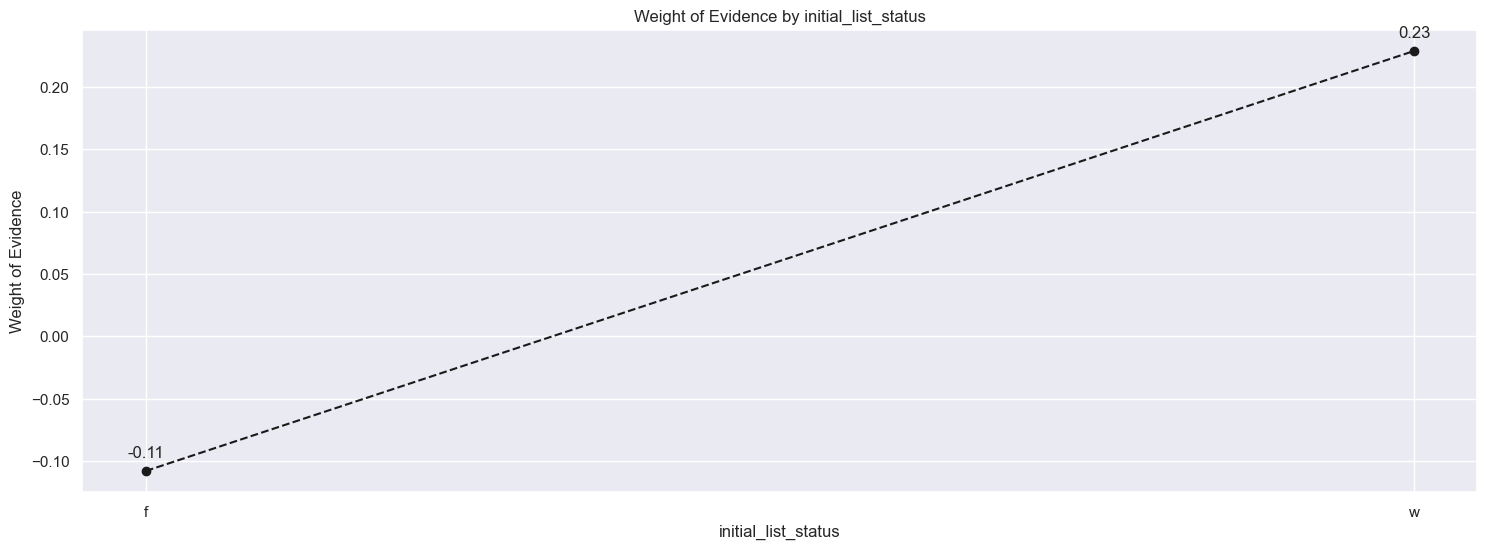

In [123]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

#### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [124]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, OC_variabe_name, good_bad_variable_df):
    df = pd.concat([df[OC_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

#### Preprocessing Continuous Variables: Creating Dummy Variables

In [125]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [126]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  270312    0.90289    0.724689  244062.0  26250.0     0.734726   
1        60  102692    0.85809    0.275311   88119.0  14573.0     0.265274   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.64302  0.133322             NaN       NaN  0.039455  
1     0.35698 -0.296917          0.0448  0.430239  0.039455

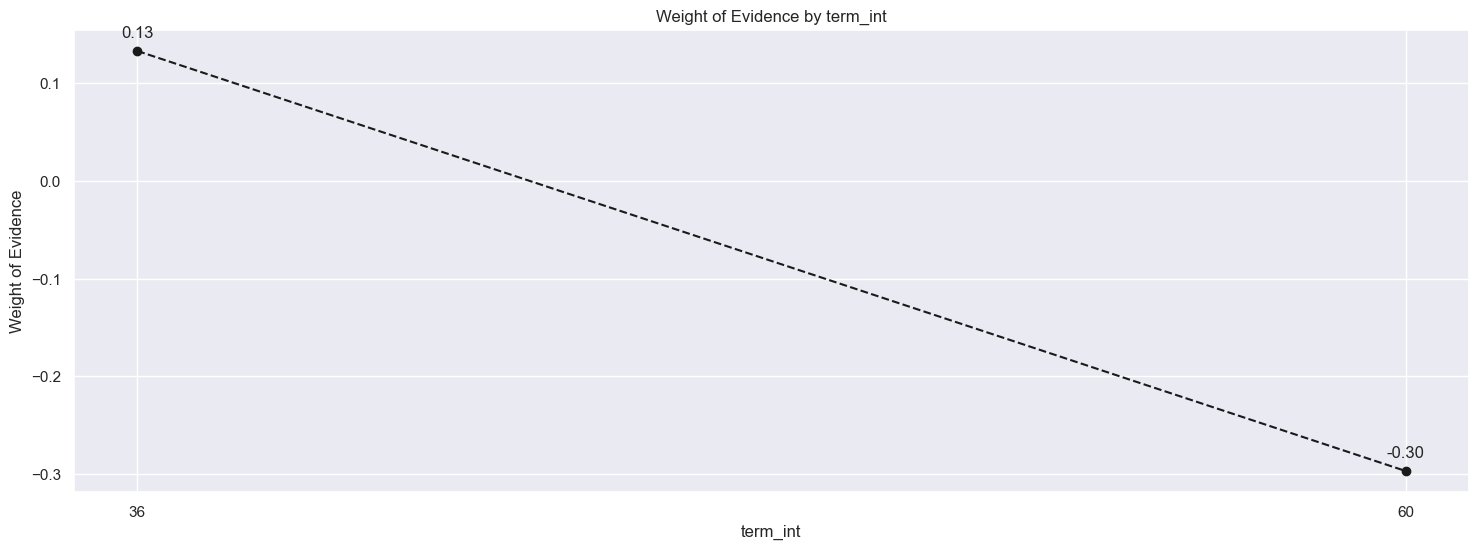

In [127]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [128]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [129]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([10,  2,  4,  0,  3,  8,  7,  6,  9,  5,  1], dtype=int64)

In [130]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                0   45861   0.875210    0.122950   40138.0   5723.0   
1                1   23656   0.887217    0.063420   20988.0   2668.0   
2                2   33187   0.890409    0.088972   29550.0   3637.0   
3                3   29273   0.891299    0.078479   26091.0   3182.0   
4                4   22522   0.890285    0.060380   20051.0   2471.0   
5                5   24589   0.884867    0.065922   21758.0   2831.0   
6                6   20980   0.884128    0.056246   18549.0   2431.0   
7                7   20861   0.888212    0.055927   18529.0   2332.0   
8                8   17978   0.890422    0.048198   16008.0   1970.0   
9                9   14356   0.886041    0.038488   12720.0   1636.0   
10              10  119741   0.900268    0.321018  107799.0  11942.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.120832    0.140191 -0.148604             NaN       NaN  0.006846  
1      0.063182    0.065355 -0.033813        0.012007  0.114791  0.006846  
2      0.088958    0.089092 -0.001510        0.003192  0.032303  0.006846  
3      0.078545    0.077946  0.007646        0.000890  0.009156  0.006846  
4      0.060362    0.060530 -0.002778        0.001014  0.010424  0.006846  
5      0.065500    0.069348 -0.057083        0.005418  0.054305  0.006846  
6      0.055840    0.059550 -0.064321        0.000739  0.007238  0.006846  
7      0.055780    0.057125 -0.023824        0.004085  0.040498  0.006846  
8      0.048191    0.048257 -0.001379        0.002209  0.022444  0.006846  
9      0.038292    0.040075 -0.045513        0.004381  0.044134  0.006846  
10     0.324519    0.292531  0.103772        0.014227  0.149285  0.006846

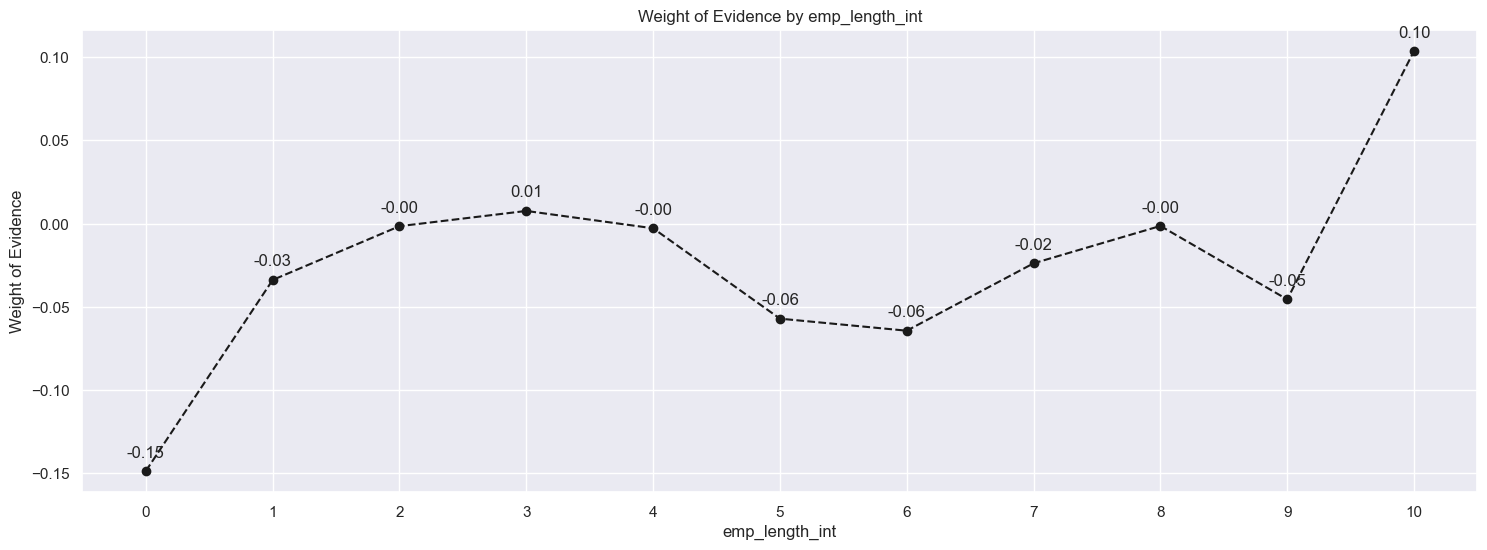

In [131]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [132]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [133]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45,  44,  51,  53, 113,  50,  63,  71,  49,  48,  41,  43,  52,
        47,  38,  40,  87,  76,  37,  62,  65,  55,  42,  58,  46,  89,
        64,  69,  79,  39,  36,  91,  73,  56,  61,  74,  54,  88,  81,
        82, 103,  83,  72,  59, 101,  68,  70,  57,  85,  60,  92,  77,
        84,  86,  90, 116,  93,  67,  95,  78,  75,  66,  80,  96,  94,
        98, 104, 125, 105, 118, 110, 119, 114,  97, 102, 106, 100, 122,
       121, 108, 117, 120, 124,  99, 115, 112, 109, 123, 107, 111, 126],
      dtype=int64)

In [134]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [135]:
df_inputs_prepr['mths_since_issue_d_factor']

431128      (43.2, 45.0]
413015      (43.2, 45.0]
90236       (50.4, 52.2]
122060      (52.2, 54.0]
41491     (111.6, 113.4]
               ...      
259207     (35.91, 37.8]
365867      (41.4, 43.2]
131961      (52.2, 54.0]
146896      (55.8, 57.6]
121987      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373004, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [136]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              (35.91, 37.8]  28296   0.943738    0.075860  26704.0  1592.0   
1               (37.8, 39.6]  39562   0.928492    0.106063  36733.0  2829.0   
2               (39.6, 41.4]  38495   0.918873    0.103203  35372.0  3123.0   
3               (41.4, 43.2]  28946   0.908727    0.077602  26304.0  2642.0   
4               (43.2, 45.0]  28419   0.901685    0.076190  25625.0  2794.0   
5               (45.0, 46.8]  12161   0.897459    0.032603  10914.0  1247.0   
6               (46.8, 48.6]  24509   0.895712    0.065707  21953.0  2556.0   
7               (48.6, 50.4]  22960   0.888545    0.061554  20401.0  2559.0   
8               (50.4, 52.2]  20595   0.879777    0.055214  18119.0  2476.0   
9               (52.2, 54.0]  18298   0.868674    0.049056  15895.0  2403.0   
10              (54.0, 55.8]   8300   0.856506    0.022252   7109.0  1191.0   
11              (55.8, 57.6]  14169   0.863434    0.037986  12234.0  1935.0   
12              (57.6, 59.4]  11541   0.858504    0.030941   9908.0  1633.0   
13              (59.4, 61.2]   9940   0.852817    0.026649   8477.0  1463.0   
14              (61.2, 63.0]   9881   0.851027    0.026490   8409.0  1472.0   
15              (63.0, 64.8]   4323   0.842702    0.011590   3643.0   680.0   
16              (64.8, 66.6]   6684   0.821364    0.017919   5490.0  1194.0   
17              (66.6, 68.4]   5359   0.839896    0.014367   4501.0   858.0   
18              (68.4, 70.2]   4374   0.848422    0.011726   3711.0   663.0   
19              (70.2, 72.0]   3877   0.820738    0.010394   3182.0   695.0   
20              (72.0, 73.8]   1785   0.855462    0.004785   1527.0   258.0   
21              (73.8, 75.6]   3395   0.853019    0.009102   2896.0   499.0   
22              (75.6, 77.4]   3056   0.853403    0.008193   2608.0   448.0   
23              (77.4, 79.2]   2849   0.842050    0.007638   2399.0   450.0   
24              (79.2, 81.0]   2413   0.852051    0.006469   2056.0   357.0   
25              (81.0, 82.8]   1044   0.869732    0.002799    908.0   136.0   
26              (82.8, 84.6]   2182   0.870761    0.005850   1900.0   282.0   
27              (84.6, 86.4]   1997   0.854782    0.005354   1707.0   290.0   
28              (86.4, 88.2]   1921   0.833941    0.005150   1602.0   319.0   
29              (88.2, 90.0]   1870   0.842246    0.005013   1575.0   295.0   
30              (90.0, 91.8]    794   0.858942    0.002129    682.0   112.0   
31              (91.8, 93.6]   1373   0.890750    0.003681   1223.0   150.0   
32              (93.6, 95.4]   1087   0.874885    0.002914    951.0   136.0   
33              (95.4, 97.2]   1045   0.882297    0.002802    922.0   123.0   
34              (97.2, 99.0]    877   0.856328    0.002351    751.0   126.0   
35             (99.0, 100.8]    346   0.878613    0.000928    304.0    42.0   
36            (100.8, 102.6]    646   0.865325    0.001732    559.0    87.0   
37            (102.6, 104.4]    542   0.850554    0.001453    461.0    81.0   
38            (104.4, 106.2]    497   0.869215    0.001332    432.0    65.0   
39            (106.2, 108.0]    403   0.853598    0.001080    344.0    59.0   
40            (108.0, 109.8]    173   0.803468    0.000464    139.0    34.0   
41            (109.8, 111.6]    139   0.834532    0.000373    116.0    23.0   
42            (111.6, 113.4]    204   0.799020    0.000547    163.0    41.0   
43            (113.4, 115.2]    182   0.796703    0.000488    145.0    37.0   
44            (115.2, 117.0]    530   0.762264    0.001421    404.0   126.0   
45            (117.0, 118.8]    247   0.797571    0.000662    197.0    50.0   
46            (118.8, 120.6]    394   0.723350    0.001056    285.0   109.0   
47            (120.6, 122.4]    176   0.704545    0.000472    124.0    52.0   
48            (122.4, 124.2]    102   0.735294    0.000273     75.0    27.0   
49            (124.2, 126.0]     46   0.913043    0.0

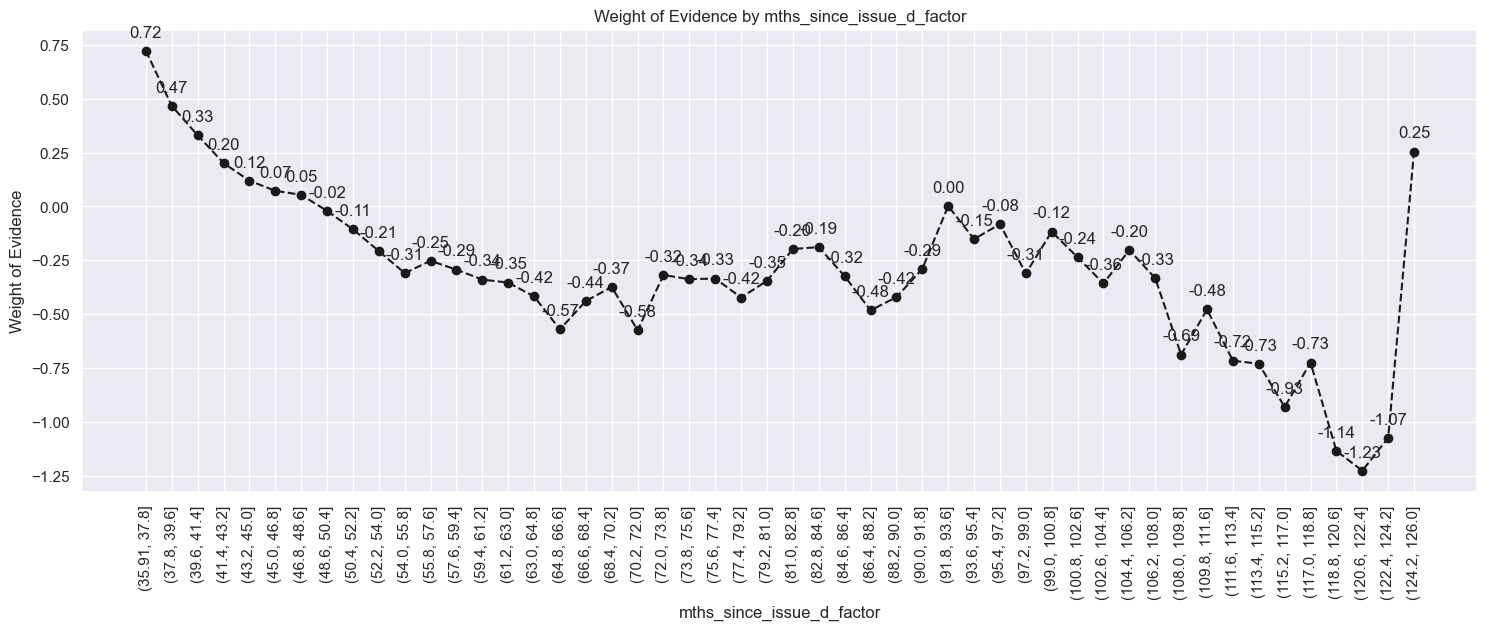

In [137]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

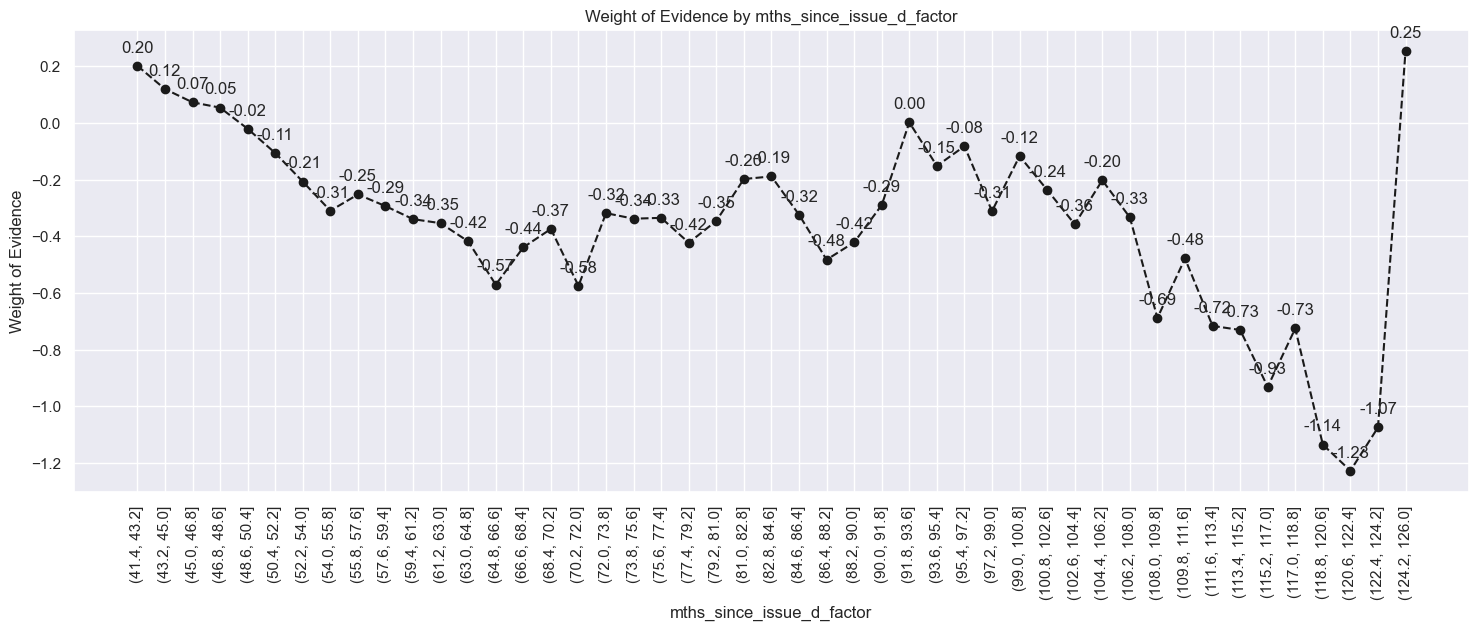

In [138]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [141]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [140]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [142]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    785   0.961783    0.002105    755.0    30.0   
1     (5.833, 6.246]   8459   0.979076    0.022678   8282.0   177.0   
2     (6.246, 6.658]   7809   0.971571    0.020935   7587.0   222.0   
3     (6.658, 7.071]   1842   0.973941    0.004938   1794.0    48.0   
4     (7.071, 7.484]   3134   0.976388    0.008402   3060.0    74.0   
5     (7.484, 7.897]  12655   0.964441    0.033927  12205.0   450.0   
6      (7.897, 8.31]   9706   0.949104    0.026021   9212.0   494.0   
7      (8.31, 8.722]   6663   0.966532    0.017863   6440.0   223.0   
8     (8.722, 9.135]   9526   0.938274    0.025539   8938.0   588.0   
9     (9.135, 9.548]   6667   0.965952    0.017874   6440.0   227.0   
10    (9.548, 9.961]   7627   0.930510    0.020448   7097.0   530.0   
11   (9.961, 10.374]  10957   0.934654    0.029375  10241.0   716.0   
12  (10.374, 10.786]   5853   0.913378    0.015692   5346.0   507.0   
13  (10.786, 11.199]  17761   0.931085    0.047616  16537.0  1224.0   
14  (11.199, 11.612]   4843   0.917200    0.012984   4442.0   401.0   
15  (11.612, 12.025]  15471   0.933101    0.041477  14436.0  1035.0   
16  (12.025, 12.438]  12412   0.895827    0.033276  11119.0  1293.0   
17   (12.438, 12.85]  10935   0.922085    0.029316  10083.0   852.0   
18   (12.85, 13.263]  21394   0.902496    0.057356  19308.0  2086.0   
19  (13.263, 13.676]  15367   0.904145    0.041198  13894.0  1473.0   
20  (13.676, 14.089]  10920   0.896520    0.029276   9790.0  1130.0   
21  (14.089, 14.502]  23345   0.889184    0.062586  20758.0  2587.0   
22  (14.502, 14.914]   4405   0.866969    0.011810   3819.0   586.0   
23  (14.914, 15.327]  18950   0.880422    0.050804  16684.0  2266.0   
24   (15.327, 15.74]  12398   0.888046    0.033238  11010.0  1388.0   
25   (15.74, 16.153]   7447   0.837653    0.019965   6238.0  1209.0   
26  (16.153, 16.566]  12988   0.855174    0.034820  11107.0  1881.0   
27  (16.566, 16.978]   4247   0.844596    0.011386   3587.0   660.0   
28  (16.978, 17.391]  11377   0.853476    0.030501   9710.0  1667.0   
29  (17.391, 17.804]  12257   0.837562    0.032860  10266.0  1991.0   
30  (17.804, 18.217]   1244   0.817524    0.003335   1017.0   227.0   
31   (18.217, 18.63]  10994   0.834819    0.029474   9178.0  1816.0   
32   (18.63, 19.042]   6959   0.820233    0.018657   5708.0  1251.0   
33  (19.042, 19.455]   4438   0.802388    0.011898   3561.0   877.0   
34  (19.455, 19.868]   6745   0.818681    0.018083   5522.0  1223.0   
35  (19.868, 20.281]   4933   0.835800    0.013225   4123.0   810.0   
36  (20.281, 20.694]   3185   0.798116    0.008539   2542.0   643.0   
37  (20.694, 21.106]   4019   0.800946    0.010775   3219.0   800.0   
38  (21.106, 21.519]   2744   0.776239    0.007356   2130.0   614.0   
39  (21.519, 21.932]    993   0.758308    0.002662    753.0   240.0   
40  (21.932, 22.345]   3459   0.789245    0.009273   2730.0   729.0   
41  (22.345, 22.758]   2302   0.753692    0.006172   1735.0   567.0   
42   (22.758, 23.17]   1524   0.756562    0.004086   1153.0   371.0   
43   (23.17, 23.583]   2618   0.785714    0.007019   2057.0   561.0   
44  (23.583, 23.996]   1604   0.733791    0.004300   1177.0   427.0   
45  (23.996, 24.409]   1466   0.781037    0.003930   1145.0   321.0   
46  (24.409, 24.822]   1689   0.766726    0.004528   1295.0   394.0   
47  (24.822, 25.234]   1325   0.774340    0.003552   1026.0   299.0   
48  (25.234, 25.647]    779   0.735558    0.002088    573.0   206.0   
49   (25.647, 26.06]   1784   0.757848    0.004783   1352.0   432.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002273    0.000735  1.129086             NaN       NaN  0.348189  
1      0.024932    0.004336  1.749256        0.017292  0.620170  0.348189  
2      0.022840    0.005438  1.435080        0.007504  0.314176  0.348189  
3      0.005401    0.001176  1.524568        0.002370  0.089488  0.348189  
4  

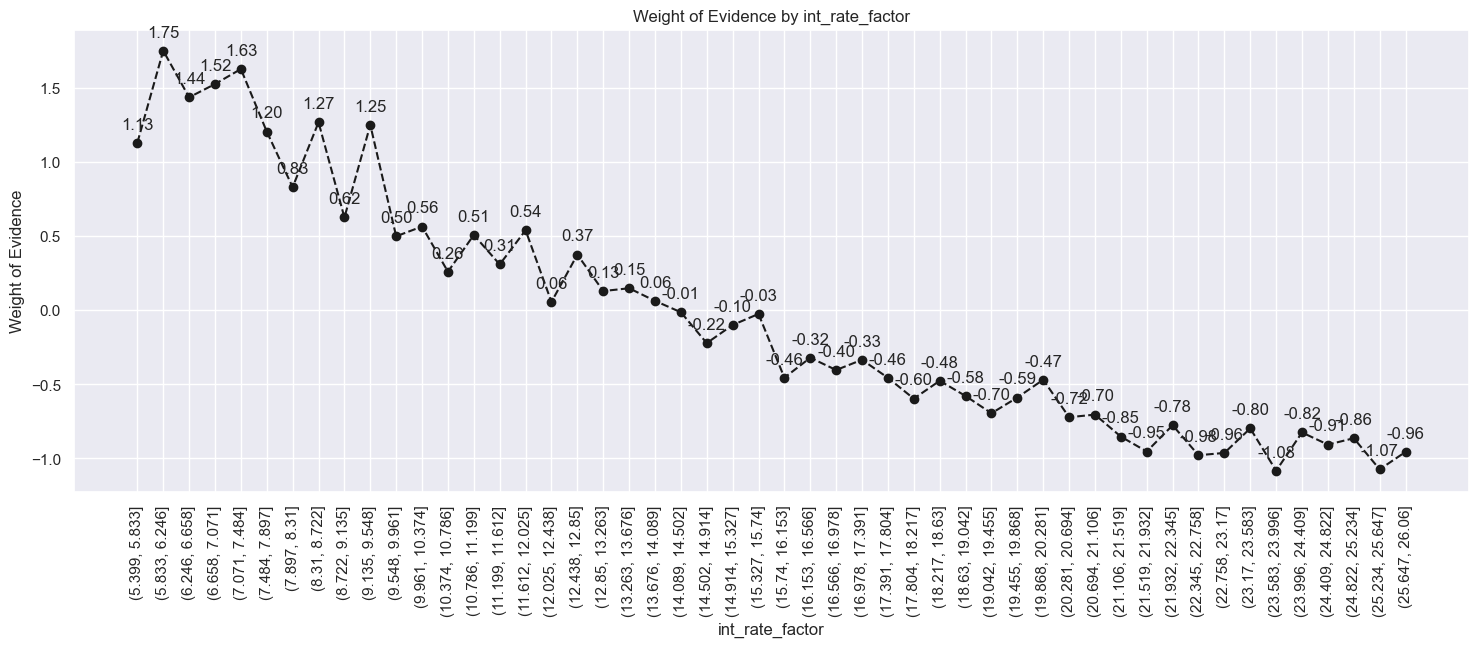

In [144]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [145]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [146]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1190.0]   1215   0.900412    0.003257   1094.0   121.0   
1     (1190.0, 1880.0]   3046   0.901510    0.008166   2746.0   300.0   
2     (1880.0, 2570.0]   6028   0.892170    0.016161   5378.0   650.0   
3     (2570.0, 3260.0]   7214   0.889520    0.019340   6417.0   797.0   
4     (3260.0, 3950.0]   4787   0.894088    0.012834   4280.0   507.0   
5     (3950.0, 4640.0]   9096   0.889292    0.024386   8089.0  1007.0   
6     (4640.0, 5330.0]  15872   0.892137    0.042552  14160.0  1712.0   
7     (5330.0, 6020.0]  17064   0.904477    0.045747  15434.0  1630.0   
8     (6020.0, 6710.0]   6890   0.887518    0.018472   6115.0   775.0   
9     (6710.0, 7400.0]  11790   0.897625    0.031608  10583.0  1207.0   
10    (7400.0, 8090.0]  17694   0.897988    0.047436  15889.0  1805.0   
11    (8090.0, 8780.0]   6344   0.881620    0.017008   5593.0   751.0   
12    (8780.0, 9470.0]   9227   0.882844    0.024737   8146.0  1081.0   
13   (9470.0, 10160.0]  33518   0.894892    0.089860  29995.0  3523.0   
14  (10160.0, 10850.0]   6737   0.872792    0.018061   5880.0   857.0   
15  (10850.0, 11540.0]   8495   0.881931    0.022775   7492.0  1003.0   
16  (11540.0, 12230.0]  23510   0.902382    0.063029  21215.0  2295.0   
17  (12230.0, 12920.0]   4832   0.875207    0.012954   4229.0   603.0   
18  (12920.0, 13610.0]   7303   0.895659    0.019579   6541.0   762.0   
19  (13610.0, 14300.0]   8135   0.894161    0.021809   7274.0   861.0   
20  (14300.0, 14990.0]   5150   0.879223    0.013807   4528.0   622.0   
21  (14990.0, 15680.0]  21660   0.900046    0.058069  19495.0  2165.0   
22  (15680.0, 16370.0]  11786   0.884524    0.031598  10425.0  1361.0   
23  (16370.0, 17060.0]   6571   0.876883    0.017616   5762.0   809.0   
24  (17060.0, 17750.0]   3491   0.865082    0.009359   3020.0   471.0   
25  (17750.0, 18440.0]  11540   0.885269    0.030938  10216.0  1324.0   
26  (18440.0, 19130.0]   3914   0.865355    0.010493   3387.0   527.0   
27  (19130.0, 19820.0]   4024   0.856859    0.010788   3448.0   576.0   
28  (19820.0, 20510.0]  20205   0.898342    0.054168  18151.0  2054.0   
29  (20510.0, 21200.0]   6659   0.893828    0.017852   5952.0   707.0   
30  (21200.0, 21890.0]   2035   0.854054    0.005456   1738.0   297.0   
31  (21890.0, 22580.0]   4134   0.888244    0.011083   3672.0   462.0   
32  (22580.0, 23270.0]   2492   0.886035    0.006681   2208.0   284.0   
33  (23270.0, 23960.0]   1883   0.849177    0.005048   1599.0   284.0   
34  (23960.0, 24650.0]   9802   0.901449    0.026279   8836.0   966.0   
35  (24650.0, 25340.0]  10050   0.891144    0.026943   8956.0  1094.0   
36  (25340.0, 26030.0]   1866   0.862272    0.005003   1609.0   257.0   
37  (26030.0, 26720.0]   1221   0.837838    0.003273   1023.0   198.0   
38  (26720.0, 27410.0]   1527   0.872299    0.004094   1332.0   195.0   
39  (27410.0, 28100.0]   6350   0.905039    0.017024   5747.0   603.0   
40  (28100.0, 28790.0]    788   0.848985    0.002113    669.0   119.0   
41  (28790.0, 29480.0]   1164   0.863402    0.003121   1005.0   159.0   
42  (29480.0, 30170.0]   7326   0.884384    0.019641   6479.0   847.0   
43  (30170.0, 30860.0]    583   0.823328    0.001563    480.0   103.0   
44  (30860.0, 31550.0]    886   0.874718    0.002375    775.0   111.0   
45  (31550.0, 32240.0]   1371   0.886944    0.003676   1216.0   155.0   
46  (32240.0, 32930.0]    607   0.883031    0.001627    536.0    71.0   
47  (32930.0, 33620.0]   1093   0.894785    0.002930    978.0   115.0   
48  (33620.0, 34310.0]    498   0.893574    0.001335    445.0    53.0   
49  (34310.0, 35000.0]  13531   0.882714    0.036276  11944.0  1587.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003293    0.002964  0.105371             NaN       NaN  0.013331  
1      0.008267    0.007349  0.117684        0.001099  0.012313  0.013331  
2      0.016190    0.015922  0.016665        0.00934

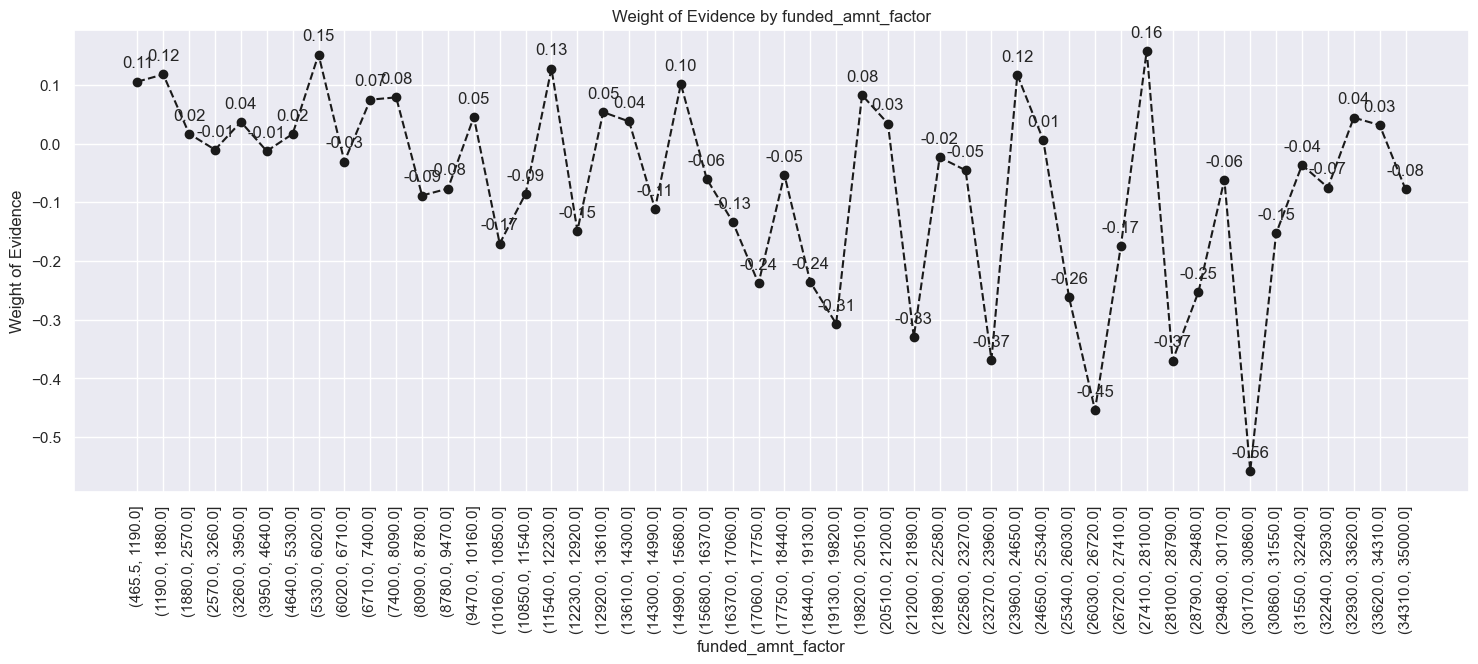

In [148]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [149]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                       (72.21, 88.8]   1785   0.905882    0.004785   1617.0   
1                       (88.8, 104.6]   3491   0.858493    0.009359   2997.0   
2                      (104.6, 120.4]   7028   0.867672    0.018842   6098.0   
3                      (120.4, 136.2]  15088   0.862739    0.040450  13017.0   
4                      (136.2, 152.0]  17576   0.875114    0.047120  15381.0   
5                      (152.0, 167.8]  20009   0.878555    0.053643  17579.0   
6                      (167.8, 183.6]  28353   0.888336    0.076013  25187.0   
7                      (183.6, 199.4]  33804   0.884185    0.090626  29889.0   
8                      (199.4, 215.2]  36686   0.884833    0.098353  32461.0   
9                      (215.2, 231.0]  35348   0.887603    0.094766  31375.0   
10                     (231.0, 246.8]  25233   0.888638    0.067648  22423.0   
11                     (246.8, 262.6]  23614   0.892140    0.063308  21067.0   
12                     (262.6, 278.4]  23368   0.897167    0.062648  20965.0   
13                     (278.4, 294.2]  19068   0.902507    0.051120  17209.0   
14                     (294.2, 310.0]  12670   0.906393    0.033967  11484.0   
15                     (310.0, 325.8]  10438   0.904771    0.027984   9444.0   
16                     (325.8, 341.6]  11324   0.905864    0.030359  10258.0   
17                     (341.6, 357.4]   9347   0.904354    0.025059   8453.0   
18                     (357.4, 373.2]   7447   0.912582    0.019965   6796.0   
19                     (373.2, 389.0]   6244   0.911115    0.016740   5689.0   
20                     (389.0, 404.8]   5216   0.908551    0.013984   4739.0   
21                     (404.8, 420.6]   4339   0.906891    0.011633   3935.0   
22                     (420.6, 436.4]   3061   0.915387    0.008206   2802.0   
23                     (436.4, 452.2]   2161   0.912540    0.005794   1972.0   
24                     (452.2, 468.0]   2184   0.914835    0.005855   1998.0   
25                     (468.0, 483.8]   1890   0.913228    0.005067   1726.0   
26                     (483.8, 499.6]   1556   0.908098    0.004172   1413.0   
27                     (499.6, 515.4]   1037   0.912247    0.002780    946.0   
28                     (515.4, 531.2]    854   0.912178    0.002290    779.0   
29                     (531.2, 547.0]    711   0.921238    0.001906    655.0   
30                     (547.0, 562.8]    460   0.906522    0.001233    417.0   
31                     (562.8, 578.6]    462   0.883117    0.001239    408.0   
32                     (578.6, 594.4]    307   0.902280    0.000823    277.0   
33                     (594.4, 610.2]    289   0.844291    0.000775    244.0   
34                     (610.2, 626.0]    185   0.864865    0.000496    160.0   
35                     (626.0, 641.8]    128   0.867188    0.000343    111.0   
36                     (641.8, 657.6]     83   0.831325    0.000223     69.0   
37                     (657.6, 673.4]     58   0.896552    0.000155     52.0   
38                     (673.4, 689.2]     35   0.914286    0.000094     32.0   
39                     (689.2, 705.0]     26   0.884615    0.000070     23.0   
40                     (705.0, 720.8]     15   0.866667    0.000040     13.0   
41                     (720.8, 736.6]      7   0.714286    0.000019      5.0   
42                     (736.6, 752.4]      4   0.500000    0.000011      2.0   
43                     (752.4, 768.2]      6   0.833333    0.000016      5.0   
44                     (768.2, 784.0]      2   1.000000    0.000005      2.0   
45                     (784.0, 799.8]      1   1.000000    0.000003      1.0   
46                     (799.8, 815.6]      3   1.000000    0.000008      3.0   
47                     (815.6, 831.4]      1   1.000000    0.000003      1.0   
48                     (831.4, 847.2]      0        NaN    0.000000      NaN   
49 

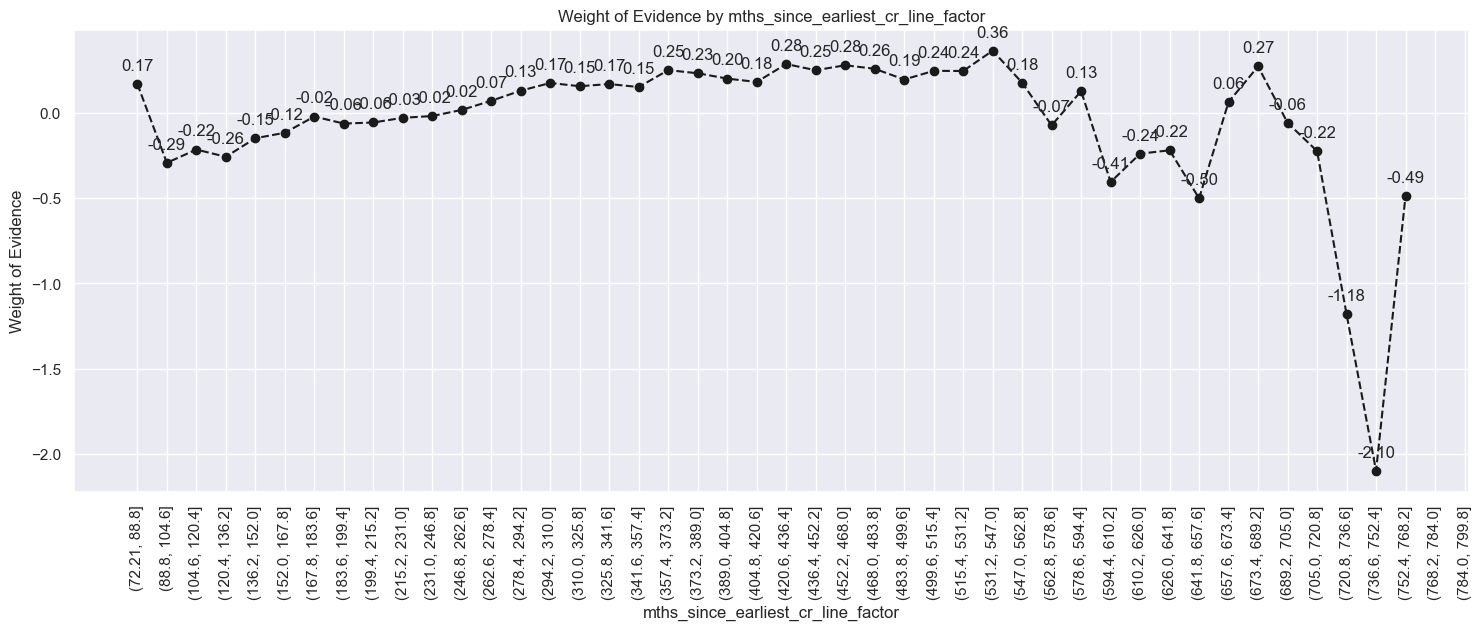

In [150]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

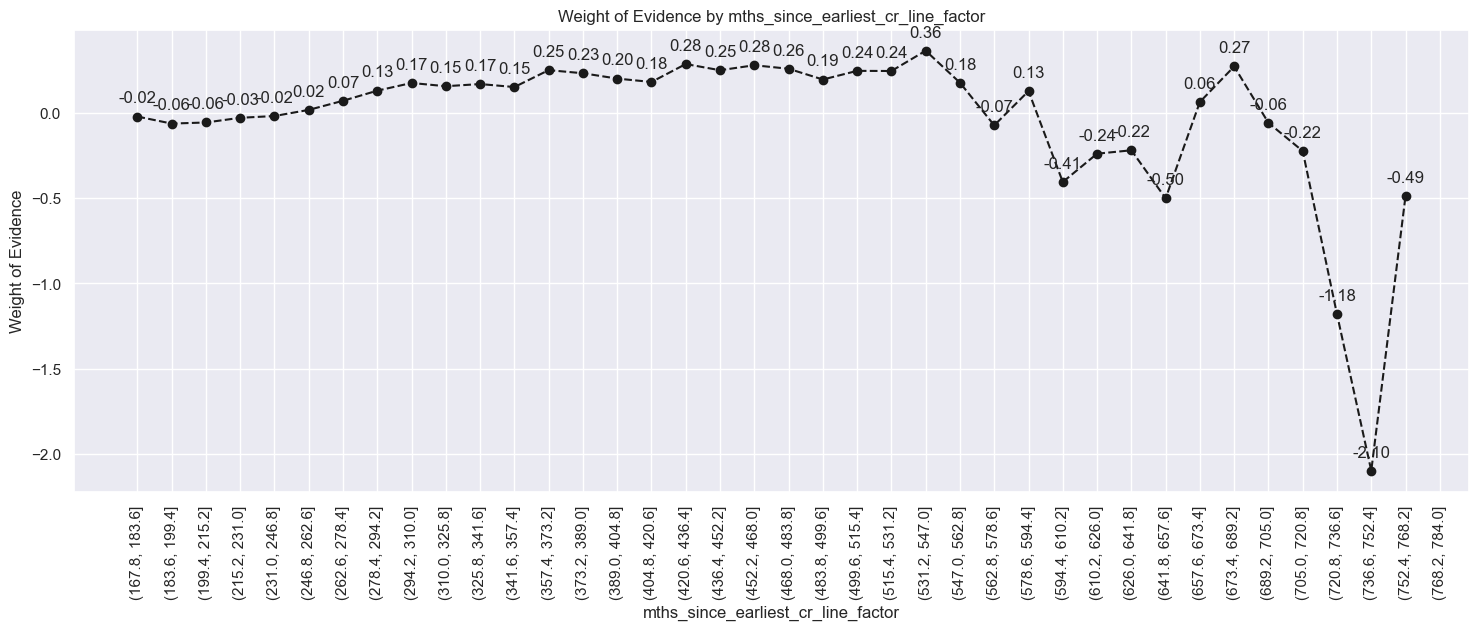

In [151]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [152]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [153]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  306378   0.890129    0.821380  272716.0  33662.0   
1           1.0   44879   0.894472    0.120318   40143.0   4736.0   
2           2.0   13105   0.889279    0.035134   11654.0   1451.0   
3           3.0    4578   0.885976    0.012273    4056.0    522.0   
4           4.0    1923   0.892876    0.005155    1717.0    206.0   
5           5.0     970   0.883505    0.002601     857.0    113.0   
6           6.0     505   0.895050    0.001354     452.0     53.0   
7           7.0     268   0.873134    0.000718     234.0     34.0   
8           8.0     146   0.890411    0.000391     130.0     16.0   
9           9.0      93   0.913978    0.000249      85.0      8.0   
10         10.0      45   0.911111    0.000121      41.0      4.0   
11         11.0      31   0.935484    0.000083      29.0      2.0   
12         12.0      31   0.709677    0.000083      22.0      9.0   
13         13.0      20   0.850000    0.000054      17.0      3.0   
14         14.0       7   1.000000    0.000019       7.0      0.0   
15         15.0       7   0.857143    0.000019       6.0      1.0   
16         16.0       4   1.000000    0.000011       4.0      0.0   
17         17.0       3   0.666667    0.000008       2.0      1.0   
18         18.0       4   0.750000    0.000011       3.0      1.0   
19         19.0       1   1.000000    0.000003       1.0      0.0   
20         21.0       2   0.500000    0.000005       1.0      1.0   
21         22.0       2   1.000000    0.000005       2.0      0.0   
22         24.0       1   1.000000    0.000003       1.0      0.0   
23         29.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.820986    0.824584 -0.004373             NaN       NaN  inf  
1      0.120847    0.116013  0.040821        0.004343  0.045194  inf  
2      0.035083    0.035544 -0.013038        0.005193  0.053859  inf  
3      0.012210    0.012787 -0.046149        0.003302  0.033112  inf  
4      0.005169    0.005046  0.024023        0.006899  0.070173  inf  
5      0.002580    0.002768 -0.070384        0.009371  0.094408  inf  
6      0.001361    0.001298  0.046956        0.011544  0.117340  inf  
7      0.000704    0.000833 -0.167474        0.021915  0.214430  inf  
8      0.000391    0.000392 -0.001489        0.017277  0.165985  inf  
9      0.000256    0.000196  0.266775        0.023568  0.268264  inf  
10     0.000123    0.000098  0.230843        0.002867  0.035932  inf  
11     0.000087    0.000049  0.577714        0.024373  0.346871  inf  
12     0.000066    0.000220 -1.202616        0.225806  1.780331  inf  
13     0.000051    0.000073 -0.361833        0.140323  0.840783  inf  
14     0.000021    0.000000       inf        0.150000       inf  inf  
15     0.000018    0.000024 -0.304675        0.142857       inf  inf  
16     0.000012    0.000000       inf        0.142857       inf  inf  
17     0.000006    0.000024 -1.403287        0.333333       inf  inf  
18     0.000009    0.000024 -0.997822        0.083333  0.405465  inf  
19     0.000003    0.000000       inf        0.250000       inf  inf  
20     0.000003    0.000024 -2.096434        0.500000       inf  inf  
21     0.000006    0.000000       inf        0.500000       inf  inf  
22     0.000003    0.000000       inf        0.000000       NaN  inf  
23     0.000003    0.000000       inf        0.000000       NaN  inf

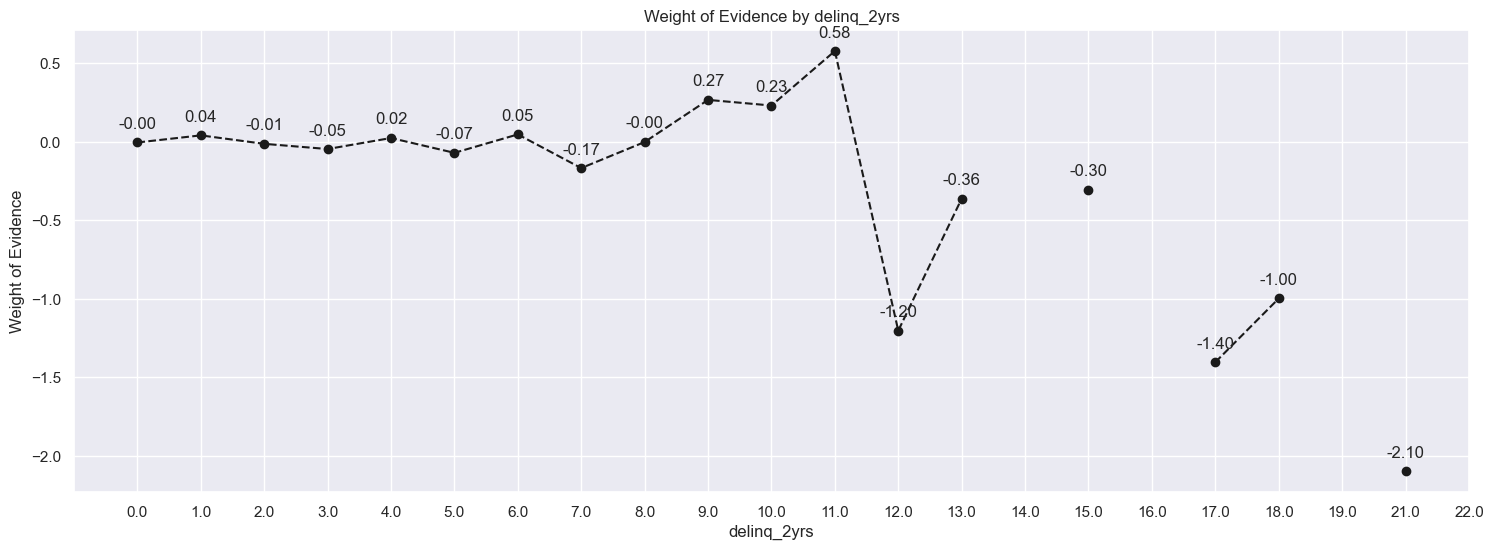

In [154]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [155]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [156]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

F:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  193106   0.908356    0.517705  175409.0  17697.0   
1              1.0  104092   0.884160    0.279064   92034.0  12058.0   
2              2.0   46371   0.864635    0.124318   40094.0   6277.0   
3              3.0   20142   0.840830    0.053999   16936.0   3206.0   
4              4.0    5751   0.849591    0.015418    4886.0    865.0   
5              5.0    2217   0.825891    0.005944    1831.0    386.0   
6              6.0     954   0.779874    0.002558     744.0    210.0   
7              7.0     160   0.681250    0.000429     109.0     51.0   
8              8.0     101   0.653465    0.000271      66.0     35.0   
9              9.0      42   0.690476    0.000113      29.0     13.0   
10            10.0      16   0.875000    0.000043      14.0      2.0   
11            11.0       8   0.625000    0.000021       5.0      3.0   
12            12.0      12   0.500000    0.000032       6.0      6.0   
13            13.0       3   1.000000    0.000008       3.0      0.0   
14            14.0       4   0.250000    0.000011       1.0      3.0   
15            15.0       9   0.444444    0.000024       4.0      5.0   
16            16.0       3   1.000000    0.000008       3.0      0.0   
17            17.0       2   0.500000    0.000005       1.0      1.0   
18            18.0       2   0.500000    0.000005       1.0      1.0   
19            19.0       1   1.000000    0.000003       1.0      0.0   
20            20.0       1   0.000000    0.000003       0.0      1.0   
21            24.0       1   1.000000    0.000003       1.0      0.0   
22            25.0       1   0.000000    0.000003       0.0      1.0   
23            27.0       1   1.000000    0.000003       1.0      0.0   
24            28.0       1   1.000000    0.000003       1.0      0.0   
25            31.0       1   1.000000    0.000003       1.0      0.0   
26            32.0       1   0.000000    0.000003       0.0      1.0   
27            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528052    0.433506  0.197291             NaN       NaN  inf  
1      0.277060    0.295373 -0.064005        0.024196  0.261296  inf  
2      0.120699    0.153761 -0.242100        0.019525  0.178095  inf  
3      0.050984    0.078534 -0.432017        0.023805  0.189917  inf  
4      0.014709    0.021189 -0.365035        0.008761  0.066982  inf  
5      0.005512    0.009455 -0.539654        0.023701  0.174620  inf  
6      0.002240    0.005144 -0.831501        0.046017  0.291847  inf  
7      0.000328    0.001249 -1.336912        0.098624  0.505411  inf  
8      0.000199    0.000857 -1.462128        0.027785  0.125216  inf  
9      0.000087    0.000318 -1.294088        0.037011  0.168040  inf  
10     0.000042    0.000049 -0.150524        0.184524  1.143564  inf  
11     0.000015    0.000073 -1.585609        0.250000  1.435085  inf  
12     0.000018    0.000147 -2.096434        0.125000  0.510826  inf  
13     0.000009    0.000000       inf        0.500000       inf  inf  
14     0.000003    0.000073 -3.195047        0.750000       inf  inf  
15     0.000012    0.000122 -2.319578        0.194444  0.875469  inf  
16     0.000009    0.000000       inf        0.555556       inf  inf  
17     0.000003    0.000024 -2.096434        0.500000       inf  inf  
18     0.000003    0.000024 -2.096434        0.000000  0.000000  inf  
19     0.000003    0.000000       inf        0.500000       inf  inf  
20     0.000000    0.000024      -inf        1.000000       inf  inf  
21     0.000003    0.000000       inf        1.000000       inf  inf  
22     0.000000    0.000024      -inf        1.000000       inf  inf  
23     0.000003    0.000000       inf        1.000000       inf  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf 

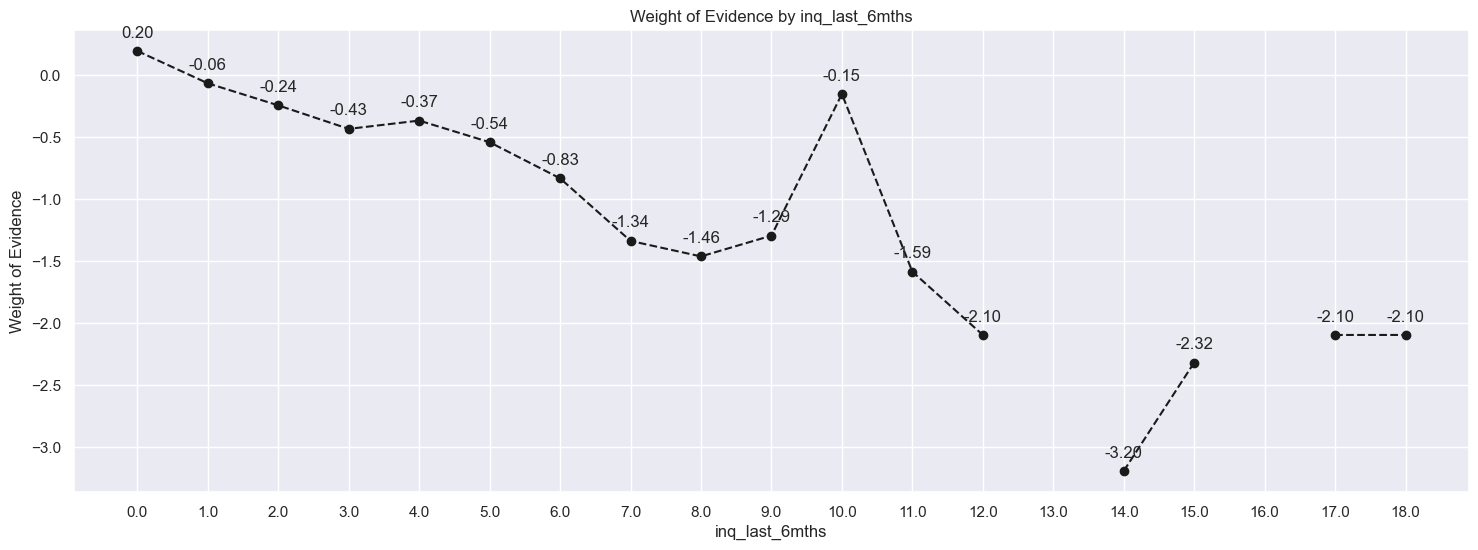

In [159]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [158]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [160]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

F:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0      5   0.400000    0.000013      2.0     3.0     0.000006   
1        1.0    116   0.887931    0.000311    103.0    13.0     0.000310   
2        2.0   1431   0.845563    0.003836   1210.0   221.0     0.003643   
3        3.0   4433   0.870065    0.011885   3857.0   576.0     0.011611   
4        4.0  10007   0.890976    0.026828   8916.0  1091.0     0.026841   
5        5.0  17125   0.888526    0.045911  15216.0  1909.0     0.045806   
6        6.0  24671   0.892019    0.066141  22007.0  2664.0     0.066250   
7        7.0  30036   0.889932    0.080525  26730.0  3306.0     0.080468   
8        8.0  33410   0.892906    0.089570  29832.0  3578.0     0.089806   
9        9.0  35245   0.889346    0.094490  31345.0  3900.0     0.094361   
10      10.0  34058   0.889277    0.091307  30287.0  3771.0     0.091176   
11      11.0  31427   0.887453    0.084254  27890.0  3537.0     0.083960   
12      12.0  27598   0.887709    0.073988  24499.0  3099.0     0.073752   
13      13.0  23890   0.894224    0.064048  21363.0  2527.0     0.064311   
14      14.0  19830   0.889360    0.053163  17636.0  2194.0     0.053092   
15      15.0  16210   0.893708    0.043458  14487.0  1723.0     0.043612   
16      16.0  13380   0.896562    0.035871  11996.0  1384.0     0.036113   
17      17.0  10784   0.890671    0.028911   9605.0  1179.0     0.028915   
18      18.0   8670   0.896194    0.023244   7770.0   900.0     0.023391   
19      19.0   6908   0.891865    0.018520   6161.0   747.0     0.018547   
20      20.0   5329   0.894727    0.014287   4768.0   561.0     0.014354   
21      21.0   4247   0.894985    0.011386   3801.0   446.0     0.011443   
22      22.0   3283   0.891258    0.008802   2926.0   357.0     0.008808   
23      23.0   2546   0.903378    0.006826   2300.0   246.0     0.006924   
24      24.0   2008   0.892430    0.005383   1792.0   216.0     0.005395   
25      25.0   1538   0.890117    0.004123   1369.0   169.0     0.004121   
26      26.0   1032   0.894380    0.002767    923.0   109.0     0.002779   
27      27.0    848   0.890330    0.002273    755.0    93.0     0.002273   
28      28.0    598   0.901338    0.001603    539.0    59.0     0.001623   
29      29.0    501   0.888224    0.001343    445.0    56.0     0.001340   
30      30.0    384   0.888021    0.001029    341.0    43.0     0.001027   
31      31.0    291   0.903780    0.000780    263.0    28.0     0.000792   
32      32.0    237   0.915612    0.000635    217.0    20.0     0.000653   
33      33.0    185   0.875676    0.000496    162.0    23.0     0.000488   
34      34.0    149   0.885906    0.000399    132.0    17.0     0.000397   
35      35.0    121   0.917355    0.000324    111.0    10.0     0.000334   
36      36.0     98   0.846939    0.000263     83.0    15.0     0.000250   
37      37.0     78   0.910256    0.000209     71.0     7.0     0.000214   
38      38.0     64   0.875000    0.000172     56.0     8.0     0.000169   
39      39.0     59   0.932203    0.000158     55.0     4.0     0.000166   
40      40.0     30   0.866667    0.000080     26.0     4.0     0.000078   
41      41.0     30   0.900000    0.000080     27.0     3.0     0.000081   
42      42.0     24   0.958333    0.000064     23.0     1.0     0.000069   
43      43.0     19   0.894737    0.000051     17.0     2.0     0.000051   
44      44.0     10   1.000000    0.000027     10.0     0.0     0.000030   
45      45.0     15   0.866667    0.000040     13.0     2.0     0.000039   
46      46.0      6   1.000000    0.000016      6.0     0.0     0.000018   
47      47.0      4   0.750000    0.000011      3.0     1.0     0.000009   
48      48.0      5   1.000000    0.000013      5.0     0.0     0.000015   
49      49.0      6   1.000000    0.000016      6.0     0.0     0.000018   
50      50.0      4   1.000000    0.000011      4.0     0.0     0.000012   
51      51.0      4   1.000000    0.000011      4.0 

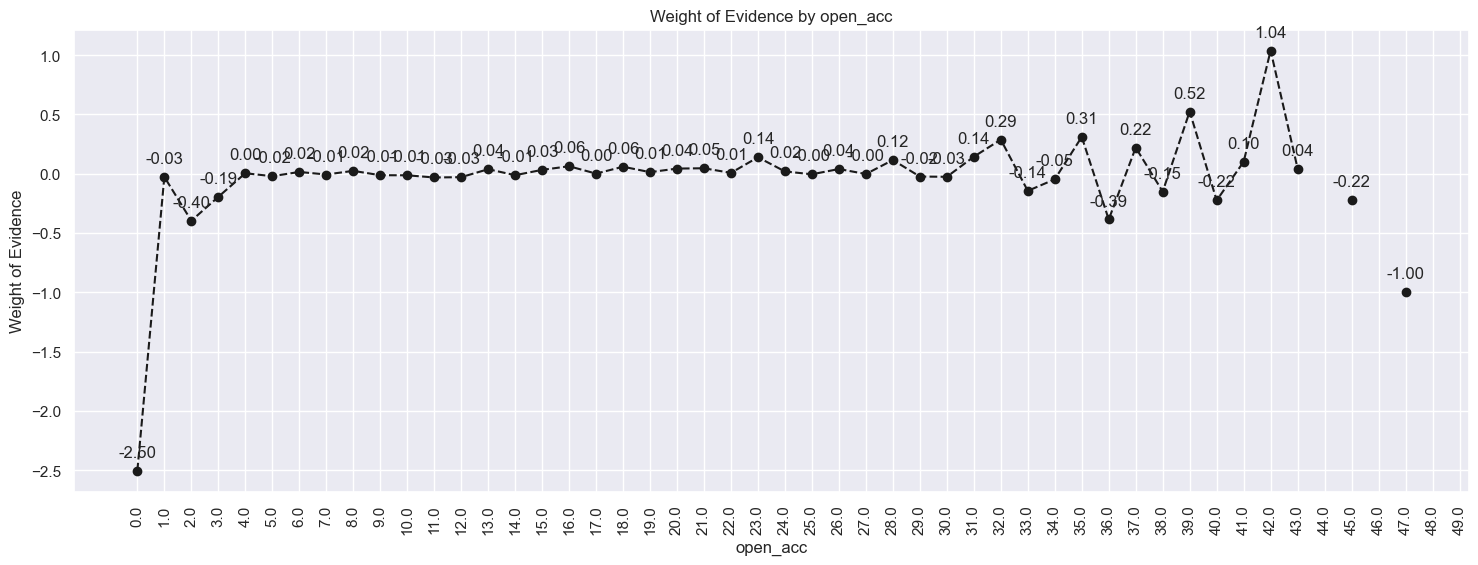

In [161]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

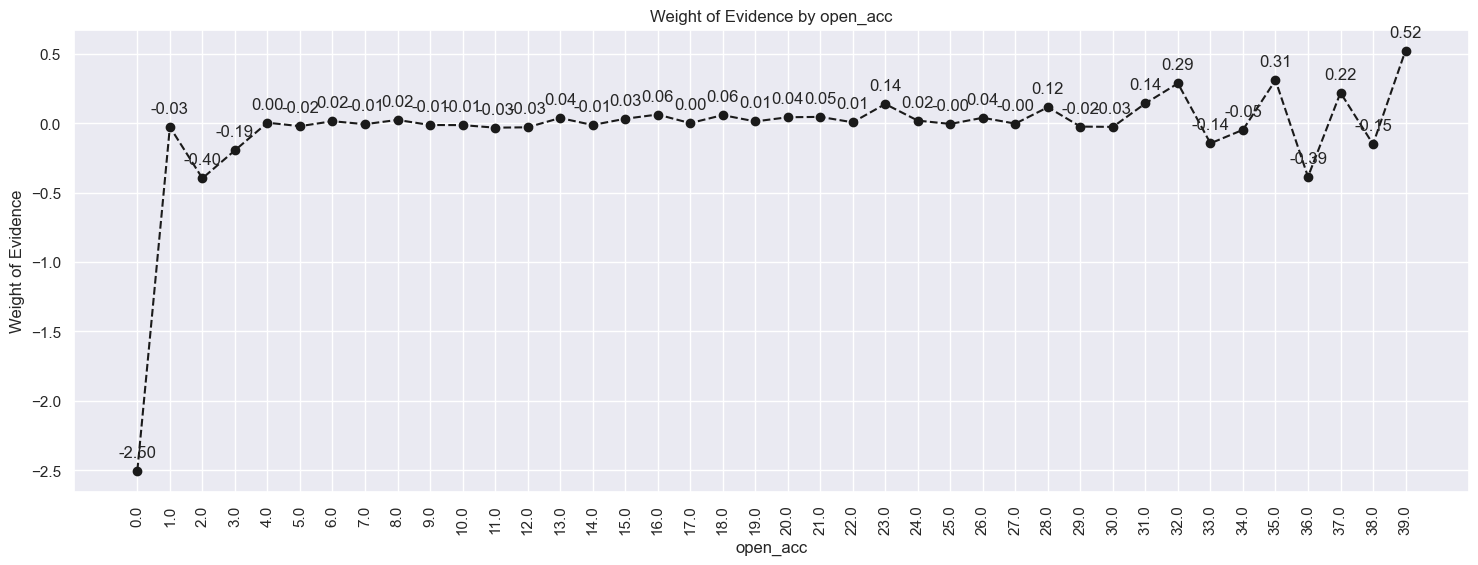

In [162]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [163]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [164]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  323850   0.889770    0.868221  288152.0  35698.0     0.867455   
1       1.0   42502   0.893629    0.113945   37981.0   4521.0     0.114338   
2       2.0    4477   0.906187    0.012003    4057.0    420.0     0.012213   
3       3.0    1296   0.912037    0.003474    1182.0    114.0     0.003558   
4       4.0     418   0.921053    0.001121     385.0     33.0     0.001159   
5       5.0     221   0.909502    0.000592     201.0     20.0     0.000605   
6       6.0     115   0.930435    0.000308     107.0      8.0     0.000322   
7       7.0      57   0.912281    0.000153      52.0      5.0     0.000157   
8       8.0      24   0.958333    0.000064      23.0      1.0     0.000069   
9       9.0      14   0.785714    0.000038      11.0      3.0     0.000033   
10     10.0      11   1.000000    0.000029      11.0      0.0     0.000033   
11     11.0       6   1.000000    0.000016       6.0      0.0     0.000018   
12     12.0       2   1.000000    0.000005       2.0      0.0     0.000006   
13     13.0       2   1.000000    0.000005       2.0      0.0     0.000006   
14     14.0       1   1.000000    0.000003       1.0      0.0     0.000003   
15     15.0       1   1.000000    0.000003       1.0      0.0     0.000003   
16     17.0       1   1.000000    0.000003       1.0      0.0     0.000003   
17     18.0       2   1.000000    0.000005       2.0      0.0     0.000006   
18     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
19     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     49.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.874458 -0.008041             NaN       NaN  inf  
1     0.110746  0.031918        0.003859  0.039959  inf  
2     0.010288  0.171510        0.012559  0.139592  inf  
3     0.002793  0.242330        0.005850  0.070820  inf  
4     0.000808  0.360301        0.009016  0.117971  inf  
5     0.000490  0.211138        0.011550  0.149163  inf  
6     0.000196  0.496953        0.020933  0.285815  inf  
7     0.000122  0.245371        0.018154  0.251581  inf  
8     0.000024  1.039060        0.046053  0.793688  inf  
9     0.000073 -0.797151        0.172619  1.836211  inf  
10    0.000000       inf        0.214286       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf

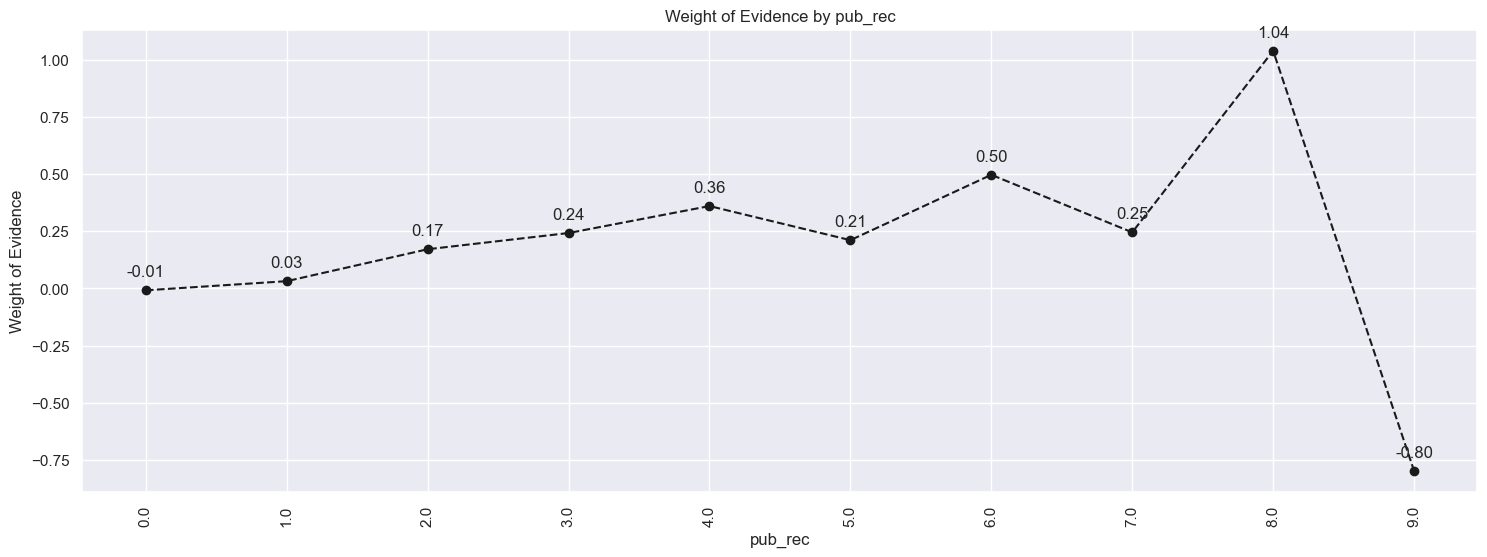

In [165]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [166]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [167]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (0.845, 4.1]   1613   0.834470    0.004324   1346.0   267.0   
1        (4.1, 7.2]   8617   0.867239    0.023102   7473.0  1144.0   
2       (7.2, 10.3]  18463   0.872935    0.049498  16117.0  2346.0   
3      (10.3, 13.4]  28257   0.880844    0.075755  24890.0  3367.0   
4      (13.4, 16.5]  35625   0.882498    0.095508  31439.0  4186.0   
5      (16.5, 19.6]  39701   0.888844    0.106436  35288.0  4413.0   
6      (19.6, 22.7]  40968   0.890036    0.109833  36463.0  4505.0   
7      (22.7, 25.8]  39036   0.891792    0.104653  34812.0  4224.0   
8      (25.8, 28.9]  34856   0.897980    0.093447  31300.0  3556.0   
9      (28.9, 32.0]  38487   0.895991    0.103181  34484.0  4003.0   
10     (32.0, 35.1]  22378   0.899142    0.059994  20121.0  2257.0   
11     (35.1, 38.2]  17481   0.901665    0.046865  15762.0  1719.0   
12     (38.2, 41.3]  13375   0.898019    0.035858  12011.0  1364.0   
13     (41.3, 44.4]  10161   0.899321    0.027241   9138.0  1023.0   
14     (44.4, 47.5]   7243   0.894381    0.019418   6478.0   765.0   
15     (47.5, 50.6]   5227   0.894968    0.014013   4678.0   549.0   
16     (50.6, 53.7]   3678   0.908646    0.009860   3342.0   336.0   
17     (53.7, 56.8]   2426   0.905606    0.006504   2197.0   229.0   
18     (56.8, 59.9]   1781   0.889388    0.004775   1584.0   197.0   
19     (59.9, 63.0]   2620   0.888550    0.007024   2328.0   292.0   
20     (63.0, 66.1]    318   0.930818    0.000853    296.0    22.0   
21     (66.1, 69.2]    207   0.917874    0.000555    190.0    17.0   
22     (69.2, 72.3]    125   0.920000    0.000335    115.0    10.0   
23     (72.3, 75.4]    115   0.913043    0.000308    105.0    10.0   
24     (75.4, 78.5]     72   0.902778    0.000193     65.0     7.0   
25     (78.5, 81.6]     52   0.884615    0.000139     46.0     6.0   
26     (81.6, 84.7]     28   0.892857    0.000075     25.0     3.0   
27     (84.7, 87.8]     33   0.939394    0.000088     31.0     2.0   
28     (87.8, 90.9]     23   0.913043    0.000062     21.0     2.0   
29     (90.9, 94.0]     14   0.928571    0.000038     13.0     1.0   
30     (94.0, 97.1]      5   1.000000    0.000013      5.0     0.0   
31    (97.1, 100.2]      6   0.833333    0.000016      5.0     1.0   
32   (100.2, 103.3]      3   1.000000    0.000008      3.0     0.0   
33   (103.3, 106.4]      4   1.000000    0.000011      4.0     0.0   
34   (106.4, 109.5]      0        NaN    0.000000      NaN     NaN   
35   (109.5, 112.6]      0        NaN    0.000000      NaN     NaN   
36   (112.6, 115.7]      0        NaN    0.000000      NaN     NaN   
37   (115.7, 118.8]      1   1.000000    0.000003      1.0     0.0   
38   (118.8, 121.9]      2   1.000000    0.000005      2.0     0.0   
39   (121.9, 125.0]      1   1.000000    0.000003      1.0     0.0   
40   (125.0, 128.1]      0        NaN    0.000000      NaN     NaN   
41   (128.1, 131.2]      0        NaN    0.000000      NaN     NaN   
42   (131.2, 134.3]      0        NaN    0.000000      NaN     NaN   
43   (134.3, 137.4]      0        NaN    0.000000      NaN     NaN   
44   (137.4, 140.5]      0        NaN    0.000000      NaN     NaN   
45   (140.5, 143.6]      0        NaN    0.000000      NaN     NaN   
46   (143.6, 146.7]      0        NaN    0.000000      NaN     NaN   
47   (146.7, 149.8]      0        NaN    0.000000      NaN     NaN   
48   (149.8, 152.9]      1   1.000000    0.000003      1.0     0.0   
49   (152.9, 156.0]      1   1.000000    0.000003      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.004052    0.006540 -0.478791             NaN       NaN  inf  
1      0.022497    0.028023 -0.219669        0.032769  0.259122  inf  
2      0.048519    0.057468 -0.169271        0.005696  0.050397  inf  
3      0.074929    0.082478 -0.095990        0.007909  0.073281  inf  
4      0.094644    0.102540 -0.080131        0.001655  0.015860  inf  
5     

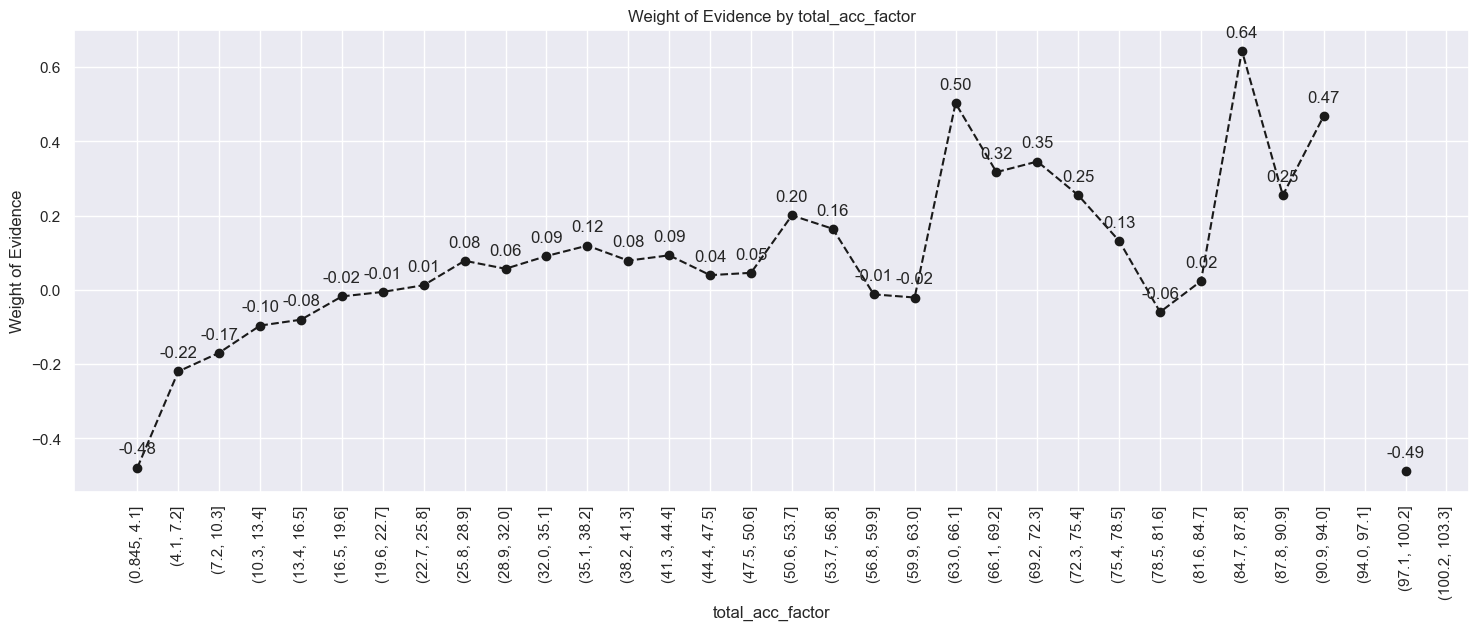

In [168]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [169]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [170]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  371615   0.890532    0.996276  330935.0  40680.0   
1             1.0    1304   0.898773    0.003496    1172.0    132.0   
2             2.0      70   0.885714    0.000188      62.0      8.0   
3             3.0      10   0.800000    0.000027       8.0      2.0   
4             4.0       3   1.000000    0.000008       3.0      0.0   
5             5.0       2   0.500000    0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996249    0.996497 -0.000249             NaN       NaN  inf  
1     0.003528    0.003233  0.087231        0.008241  0.087480  inf  
2     0.000187    0.000196 -0.048742        0.013059  0.135972  inf  
3     0.000024    0.000049 -0.710140        0.085714  0.661398  inf  
4     0.000009    0.000000       inf        0.200000       inf  inf  
5     0.000003    0.000024 -2.096434        0.500000       inf  inf

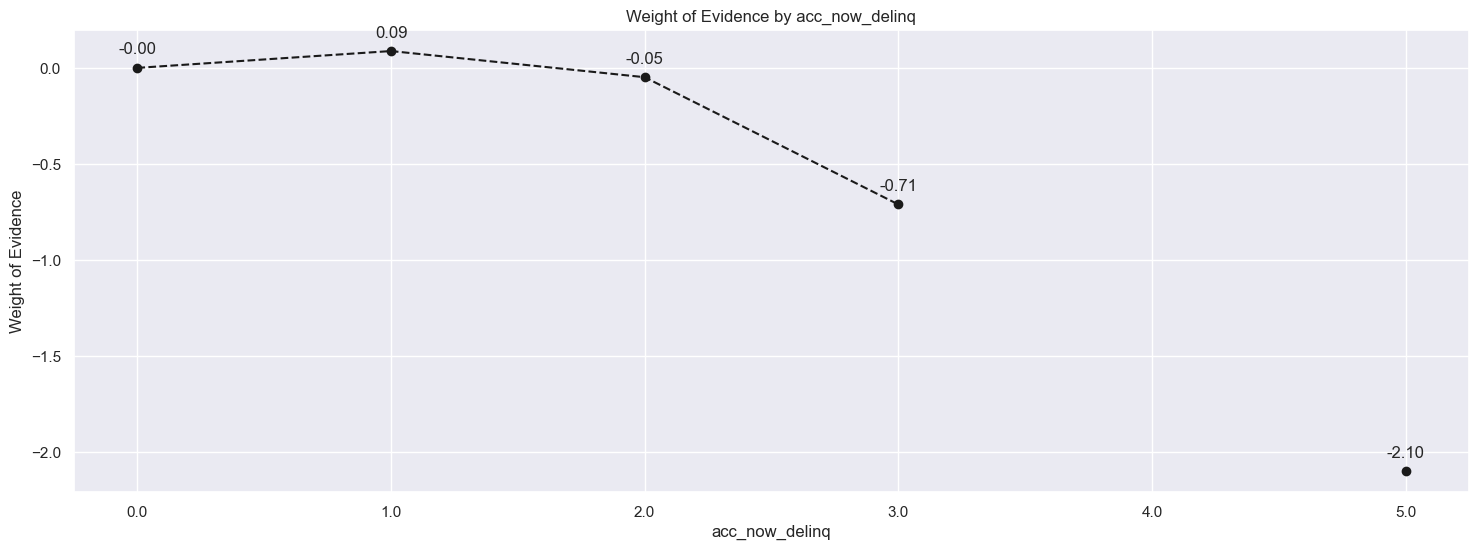

In [172]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [173]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [174]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
F:\anaconda3\envs\Udemycreditriskmodel\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  19472   0.865756    0.052203  16858.0   
1             (5000.0, 9999.999]  52633   0.875078    0.141106  46058.0   
2          (9999.999, 14999.998]  59509   0.879648    0.159540  52347.0   
3         (14999.998, 19999.998]  51517   0.878758    0.138114  45271.0   
4         (19999.998, 24999.997]  41537   0.886776    0.111358  36834.0   
...                          ...    ...        ...         ...      ...   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000      NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000      NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000      NaN   
1998    (9989999.001, 9994999.0]      0        NaN    0.000000      NaN   
1999      (9994999.0, 9999999.0]      1   1.000000    0.000003      1.0   

       n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     2614.0     0.050749    0.064033 -0.232491             NaN       NaN  inf  
1     6575.0     0.138653    0.161061 -0.149807        0.009322  0.082683  inf  
2     7162.0     0.157586    0.175440 -0.107329        0.004570  0.042478  inf  
3     6246.0     0.136284    0.153002 -0.115709        0.000890  0.008380  inf  
4     4703.0     0.110885    0.115205 -0.038214        0.008017  0.077495  inf  
...      ...          ...         ...       ...             ...       ...  ...  
1995     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1996     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1997     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1998     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.0     0.000003    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

In [175]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [176]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [177]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [178]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (14.276, 43.556]   1820   0.900000    0.004879   1638.0   182.0   
1       (43.556, 71.443]   4853   0.897383    0.013011   4355.0   498.0   
2       (71.443, 99.329]   6786   0.891689    0.018193   6051.0   735.0   
3      (99.329, 127.216]   9154   0.890212    0.024541   8149.0  1005.0   
4     (127.216, 155.102]  10164   0.895415    0.027249   9101.0  1063.0   
5     (155.102, 182.988]  16725   0.894469    0.044839  14960.0  1765.0   
6     (182.988, 210.875]  17034   0.904250    0.045667  15403.0  1631.0   
7     (210.875, 238.761]  15088   0.898860    0.040450  13562.0  1526.0   
8     (238.761, 266.648]  18839   0.901322    0.050506  16980.0  1859.0   
9     (266.648, 294.534]  20213   0.891209    0.054190  18014.0  2199.0   
10     (294.534, 322.42]  20395   0.899191    0.054678  18339.0  2056.0   
11     (322.42, 350.307]  25462   0.890189    0.068262  22666.0  2796.0   
12    (350.307, 378.193]  19082   0.885966    0.051158  16906.0  2176.0   
13     (378.193, 406.08]  17999   0.894994    0.048254  16109.0  1890.0   
14     (406.08, 433.966]  13387   0.879211    0.035890  11770.0  1617.0   
15    (433.966, 461.852]  12666   0.881731    0.033957  11168.0  1498.0   
16    (461.852, 489.739]  15699   0.891585    0.042088  13997.0  1702.0   
17    (489.739, 517.625]  15668   0.890541    0.042005  13953.0  1715.0   
18    (517.625, 545.512]  10712   0.866412    0.028718   9281.0  1431.0   
19    (545.512, 573.398]  10577   0.878415    0.028356   9291.0  1286.0   
20    (573.398, 601.284]   9419   0.877694    0.025252   8267.0  1152.0   
21    (601.284, 629.171]   9402   0.904807    0.025206   8507.0   895.0   
22    (629.171, 657.057]   8346   0.894800    0.022375   7468.0   878.0   
23    (657.057, 684.944]   9114   0.894448    0.024434   8152.0   962.0   
24     (684.944, 712.83]   6189   0.876878    0.016592   5427.0   762.0   
25     (712.83, 740.716]   4887   0.882955    0.013102   4315.0   572.0   
26    (740.716, 768.603]   5261   0.896788    0.014104   4718.0   543.0   
27    (768.603, 796.489]   4936   0.899919    0.013233   4442.0   494.0   
28    (796.489, 824.376]   4049   0.887380    0.010855   3593.0   456.0   
29    (824.376, 852.262]   3679   0.888285    0.009863   3268.0   411.0   
30    (852.262, 880.148]   4146   0.890738    0.011115   3693.0   453.0   
31    (880.148, 908.035]   3234   0.871367    0.008670   2818.0   416.0   
32    (908.035, 935.921]   2204   0.874773    0.005909   1928.0   276.0   
33    (935.921, 963.808]   2449   0.875868    0.006566   2145.0   304.0   
34    (963.808, 991.694]   1763   0.836642    0.004726   1475.0   288.0   
35    (991.694, 1019.58]   1621   0.851943    0.004346   1381.0   240.0   
36   (1019.58, 1047.467]   1262   0.866086    0.003383   1093.0   169.0   
37  (1047.467, 1075.353]    895   0.882682    0.002399    790.0   105.0   
38   (1075.353, 1103.24]   1042   0.926104    0.002794    965.0    77.0   
39   (1103.24, 1131.126]    824   0.915049    0.002209    754.0    70.0   
40  (1131.126, 1159.012]    988   0.918016    0.002649    907.0    81.0   
41  (1159.012, 1186.899]   1163   0.912296    0.003118   1061.0   102.0   
42  (1186.899, 1214.785]   1243   0.902655    0.003332   1122.0   121.0   
43  (1214.785, 1242.672]   1031   0.895247    0.002764    923.0   108.0   
44  (1242.672, 1270.558]    703   0.864865    0.001885    608.0    95.0   
45  (1270.558, 1298.444]    454   0.825991    0.001217    375.0    79.0   
46  (1298.444, 1326.331]    190   0.773684    0.000509    147.0    43.0   
47  (1326.331, 1354.217]    115   0.773913    0.000308     89.0    26.0   
48  (1354.217, 1382.104]     40   0.750000    0.000107     30.0    10.0   
49   (1382.104, 1409.99]     32   0.843750    0.000086     27.0     5.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.004931    0.004458  0.100790             NaN       NaN  0.012519  
1      0.013110    0.012199 

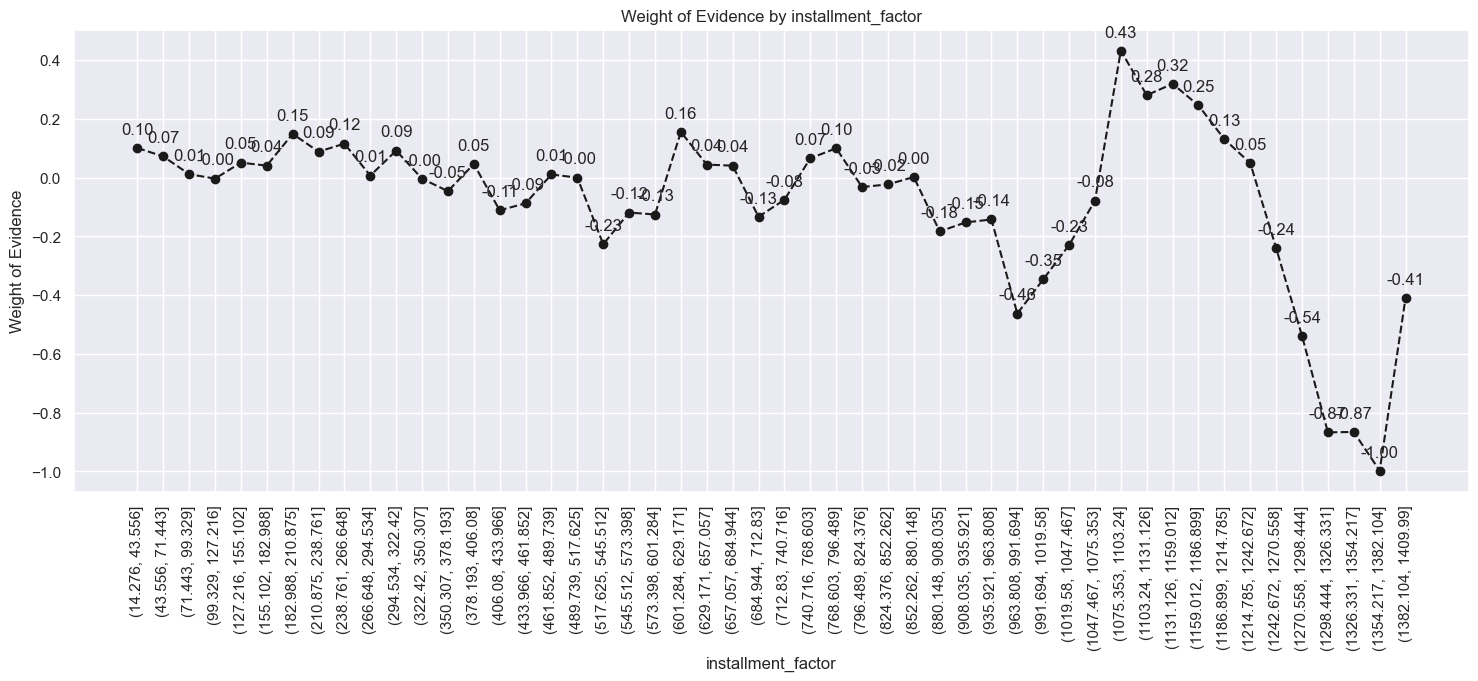

In [179]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [180]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0     (-5602.104, 151858.08]  356645   0.888870    0.956143  317011.0   
1     (151858.08, 301820.16]   14732   0.927030    0.039496   13657.0   
2     (301820.16, 451782.24]    1100   0.929091    0.002949    1022.0   
3     (451782.24, 601744.32]     306   0.941176    0.000820     288.0   
4      (601744.32, 751706.4]      92   0.891304    0.000247      82.0   
5      (751706.4, 901668.48]      61   0.885246    0.000164      54.0   
6    (901668.48, 1051630.56]      24   0.958333    0.000064      23.0   
7   (1051630.56, 1201592.64]      17   1.000000    0.000046      17.0   
8   (1201592.64, 1351554.72]       7   1.000000    0.000019       7.0   
9    (1351554.72, 1501516.8]       6   1.000000    0.000016       6.0   
10   (1501516.8, 1651478.88]       1   1.000000    0.000003       1.0   
11  (1651478.88, 1801440.96]       1   1.000000    0.000003       1.0   
12  (1801440.96, 1951403.04]       1   1.000000    0.000003       1.0   
13  (1951403.04, 2101365.12]       4   1.000000    0.000011       4.0   
14   (2101365.12, 2251327.2]       0        NaN    0.000000       NaN   
15   (2251327.2, 2401289.28]       0        NaN    0.000000       NaN   
16  (2401289.28, 2551251.36]       0        NaN    0.000000       NaN   
17  (2551251.36, 2701213.44]       0        NaN    0.000000       NaN   
18  (2701213.44, 2851175.52]       0        NaN    0.000000       NaN   
19   (2851175.52, 3001137.6]       0        NaN    0.000000       NaN   
20   (3001137.6, 3151099.68]       0        NaN    0.000000       NaN   
21  (3151099.68, 3301061.76]       0        NaN    0.000000       NaN   
22  (3301061.76, 3451023.84]       0        NaN    0.000000       NaN   
23  (3451023.84, 3600985.92]       0        NaN    0.000000       NaN   
24   (3600985.92, 3750948.0]       0        NaN    0.000000       NaN   
25   (3750948.0, 3900910.08]       1   1.000000    0.000003       1.0   
26  (3900910.08, 4050872.16]       0        NaN    0.000000       NaN   
27  (4050872.16, 4200834.24]       0        NaN    0.000000       NaN   
28  (4200834.24, 4350796.32]       0        NaN    0.000000       NaN   
29   (4350796.32, 4500758.4]       0        NaN    0.000000       NaN   
30   (4500758.4, 4650720.48]       1   1.000000    0.000003       1.0   
31  (4650720.48, 4800682.56]       0        NaN    0.000000       NaN   
32  (4800682.56, 4950644.64]       0        NaN    0.000000       NaN   
33  (4950644.64, 5100606.72]       1   1.000000    0.000003       1.0   
34   (5100606.72, 5250568.8]       0        NaN    0.000000       NaN   
35   (5250568.8, 5400530.88]       0        NaN    0.000000       NaN   
36  (5400530.88, 5550492.96]       0        NaN    0.000000       NaN   
37  (5550492.96, 5700455.04]       0        NaN    0.000000       NaN   
38  (5700455.04, 5850417.12]       0        NaN    0.000000       NaN   
39   (5850417.12, 6000379.2]       1   1.000000    0.000003       1.0   
40   (6000379.2, 6150341.28]       1   1.000000    0.000003       1.0   
41  (6150341.28, 6300303.36]       0        NaN    0.000000       NaN   
42  (6300303.36, 6450265.44]       0        NaN    0.000000       NaN   
43  (6450265.44, 6600227.52]       0        NaN    0.000000       NaN   
44   (6600227.52, 6750189.6]       0        NaN    0.000000       NaN   
45   (6750189.6, 6900151.68]       0        NaN    0.000000       NaN   
46  (6900151.68, 7050113.76]       0        NaN    0.000000       NaN   
47  (7050113.76, 7200075.84]       0        NaN    0.000000       NaN   
48  (7200075.84, 7350037.92]       0        NaN    0.000000       NaN   
49   (7350037.92, 7500000.0]       2   1.000000    0.000005       2.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   39634.0     0.954332    0.970874 -0.017185             NaN       NaN  inf  
1    1075.0     0.041113    0.026333  0.445497        0.038160  0.462682  inf  
2      78.0     0.003077    0.001911  0.476374 

In [181]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0      (-5602.104, 76877.04]  245231   0.877214    0.657449  215120.0   
1      (76877.04, 151858.08]  111414   0.914526    0.298694  101891.0   
2     (151858.08, 226839.12]   11857   0.927469    0.031788   10997.0   
3     (226839.12, 301820.16]    2875   0.925217    0.007708    2660.0   
4      (301820.16, 376801.2]     697   0.921090    0.001869     642.0   
5      (376801.2, 451782.24]     403   0.942928    0.001080     380.0   
6     (451782.24, 526763.28]     195   0.953846    0.000523     186.0   
7     (526763.28, 601744.32]     111   0.918919    0.000298     102.0   
8     (601744.32, 676725.36]      42   0.880952    0.000113      37.0   
9      (676725.36, 751706.4]      50   0.900000    0.000134      45.0   
10     (751706.4, 826687.44]      23   0.782609    0.000062      18.0   
11    (826687.44, 901668.48]      38   0.947368    0.000102      36.0   
12    (901668.48, 976649.52]       9   0.888889    0.000024       8.0   
13   (976649.52, 1051630.56]      15   1.000000    0.000040      15.0   
14   (1051630.56, 1126611.6]       9   1.000000    0.000024       9.0   
15   (1126611.6, 1201592.64]       8   1.000000    0.000021       8.0   
16  (1201592.64, 1276573.68]       4   1.000000    0.000011       4.0   
17  (1276573.68, 1351554.72]       3   1.000000    0.000008       3.0   
18  (1351554.72, 1426535.76]       2   1.000000    0.000005       2.0   
19   (1426535.76, 1501516.8]       4   1.000000    0.000011       4.0   
20   (1501516.8, 1576497.84]       0        NaN    0.000000       NaN   
21  (1576497.84, 1651478.88]       1   1.000000    0.000003       1.0   
22  (1651478.88, 1726459.92]       0        NaN    0.000000       NaN   
23  (1726459.92, 1801440.96]       1   1.000000    0.000003       1.0   
24   (1801440.96, 1876422.0]       0        NaN    0.000000       NaN   
25   (1876422.0, 1951403.04]       1   1.000000    0.000003       1.0   
26  (1951403.04, 2026384.08]       3   1.000000    0.000008       3.0   
27  (2026384.08, 2101365.12]       1   1.000000    0.000003       1.0   
28  (2101365.12, 2176346.16]       0        NaN    0.000000       NaN   
29   (2176346.16, 2251327.2]       0        NaN    0.000000       NaN   
30   (2251327.2, 2326308.24]       0        NaN    0.000000       NaN   
31  (2326308.24, 2401289.28]       0        NaN    0.000000       NaN   
32  (2401289.28, 2476270.32]       0        NaN    0.000000       NaN   
33  (2476270.32, 2551251.36]       0        NaN    0.000000       NaN   
34   (2551251.36, 2626232.4]       0        NaN    0.000000       NaN   
35   (2626232.4, 2701213.44]       0        NaN    0.000000       NaN   
36  (2701213.44, 2776194.48]       0        NaN    0.000000       NaN   
37  (2776194.48, 2851175.52]       0        NaN    0.000000       NaN   
38  (2851175.52, 2926156.56]       0        NaN    0.000000       NaN   
39   (2926156.56, 3001137.6]       0        NaN    0.000000       NaN   
40   (3001137.6, 3076118.64]       0        NaN    0.000000       NaN   
41  (3076118.64, 3151099.68]       0        NaN    0.000000       NaN   
42  (3151099.68, 3226080.72]       0        NaN    0.000000       NaN   
43  (3226080.72, 3301061.76]       0        NaN    0.000000       NaN   
44   (3301061.76, 3376042.8]       0        NaN    0.000000       NaN   
45   (3376042.8, 3451023.84]       0        NaN    0.000000       NaN   
46  (3451023.84, 3526004.88]       0        NaN    0.000000       NaN   
47  (3526004.88, 3600985.92]       0        NaN    0.000000       NaN   
48  (3600985.92, 3675966.96]       0        NaN    0.000000       NaN   
49   (3675966.96, 3750948.0]       0        NaN    0.000000       NaN   
50   (3750948.0, 3825929.04]       0        NaN    0.000000       NaN   
51  (3825929.04, 3900910.08]       1   1.000000    0.000003       1.0   
52  (3900910.08, 3975891.12]       0        NaN    0.000000       NaN   
53  (3975891.12, 4050872.16]       0        NaN    0.000000       NaN

In [182]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [183]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\2604529898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to 

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (1757.896, 4658.08]     12   0.750000    0.000034      9.0     3.0   
1       (4658.08, 7420.16]     35   0.771429    0.000100     27.0     8.0   
2      (7420.16, 10182.24]    299   0.866221    0.000852    259.0    40.0   
3     (10182.24, 12944.32]    547   0.822669    0.001558    450.0    97.0   
4      (12944.32, 15706.4]   1218   0.830049    0.003470   1011.0   207.0   
5      (15706.4, 18468.48]   1538   0.844603    0.004382   1299.0   239.0   
6     (18468.48, 21230.56]   2926   0.852016    0.008336   2493.0   433.0   
7     (21230.56, 23992.64]   2544   0.845519    0.007248   2151.0   393.0   
8     (23992.64, 26754.72]   7053   0.849426    0.020093   5991.0  1062.0   
9      (26754.72, 29516.8]   5640   0.855674    0.016068   4826.0   814.0   
10     (29516.8, 32278.88]  11821   0.856273    0.033677  10122.0  1699.0   
11    (32278.88, 35040.96]  12254   0.860617    0.034911  10546.0  1708.0   
12    (35040.96, 37803.04]   7957   0.858489    0.022669   6831.0  1126.0   
13    (37803.04, 40565.12]  17813   0.866895    0.050748  15442.0  2371.0   
14     (40565.12, 43327.2]  12455   0.867523    0.035483  10805.0  1650.0   
15     (43327.2, 46089.28]  16406   0.871876    0.046739  14304.0  2102.0   
16    (46089.28, 48851.36]   9967   0.880004    0.028395   8771.0  1196.0   
17    (48851.36, 51613.44]  19160   0.881263    0.054585  16885.0  2275.0   
18    (51613.44, 54375.52]  12732   0.883286    0.036272  11246.0  1486.0   
19     (54375.52, 57137.6]  16133   0.886010    0.045962  14294.0  1839.0   
20     (57137.6, 59899.68]   6484   0.882480    0.018472   5722.0   762.0   
21    (59899.68, 62661.76]  21408   0.883361    0.060990  18911.0  2497.0   
22    (62661.76, 65423.84]  16100   0.890248    0.045868  14333.0  1767.0   
23    (65423.84, 68185.92]   7980   0.898371    0.022734   7169.0   811.0   
24     (68185.92, 70948.0]  12888   0.894553    0.036717  11529.0  1359.0   
25     (70948.0, 73710.08]   8361   0.901806    0.023820   7540.0   821.0   
26    (73710.08, 76472.16]  13177   0.900281    0.037540  11863.0  1314.0   
27    (76472.16, 79234.24]   5674   0.900247    0.016165   5108.0   566.0   
28    (79234.24, 81996.32]  11538   0.900156    0.032871  10386.0  1152.0   
29     (81996.32, 84758.4]   6027   0.912560    0.017170   5500.0   527.0   
30     (84758.4, 87520.48]   9918   0.906332    0.028256   8989.0   929.0   
31    (87520.48, 90282.56]  10291   0.910504    0.029318   9370.0   921.0   
32    (90282.56, 93044.64]   4350   0.917931    0.012393   3993.0   357.0   
33    (93044.64, 95806.72]   5666   0.920049    0.016142   5213.0   453.0   
34     (95806.72, 98568.8]   4679   0.910451    0.013330   4260.0   419.0   
35    (98568.8, 101330.88]   8781   0.912197    0.025016   8010.0   771.0   
36  (101330.88, 104092.96]   3224   0.915943    0.009185   2953.0   271.0   
37  (104092.96, 106855.04]   3788   0.926610    0.010792   3510.0   278.0   
38  (106855.04, 109617.12]   2322   0.922481    0.006615   2142.0   180.0   
39   (109617.12, 112379.2]   5656   0.917256    0.016114   5188.0   468.0   
40   (112379.2, 115141.28]   3233   0.931333    0.009211   3011.0   222.0   
41  (115141.28, 117903.36]   1110   0.919820    0.003162   1021.0    89.0   
42  (117903.36, 120665.44]   6211   0.915151    0.017695   5684.0   527.0   
43  (120665.44, 123427.52]   1027   0.941577    0.002926    967.0    60.0   
44   (123427.52, 126189.6]   3531   0.922118    0.010060   3256.0   275.0   
45   (126189.6, 128951.68]    794   0.921914    0.002262    732.0    62.0   
46  (128951.68, 131713.76]   3025   0.929917    0.008618   2813.0   212.0   
47  (131713.76, 134475.84]    832   0.931490    0.002370    775.0    57.0   
48  (134475.84, 137237.92]   1879   0.937201    0.005353   1761.0   118.0   
49   (137237.92, 140000.0]   2546   0.921838    0.007253   2347.0   199.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    

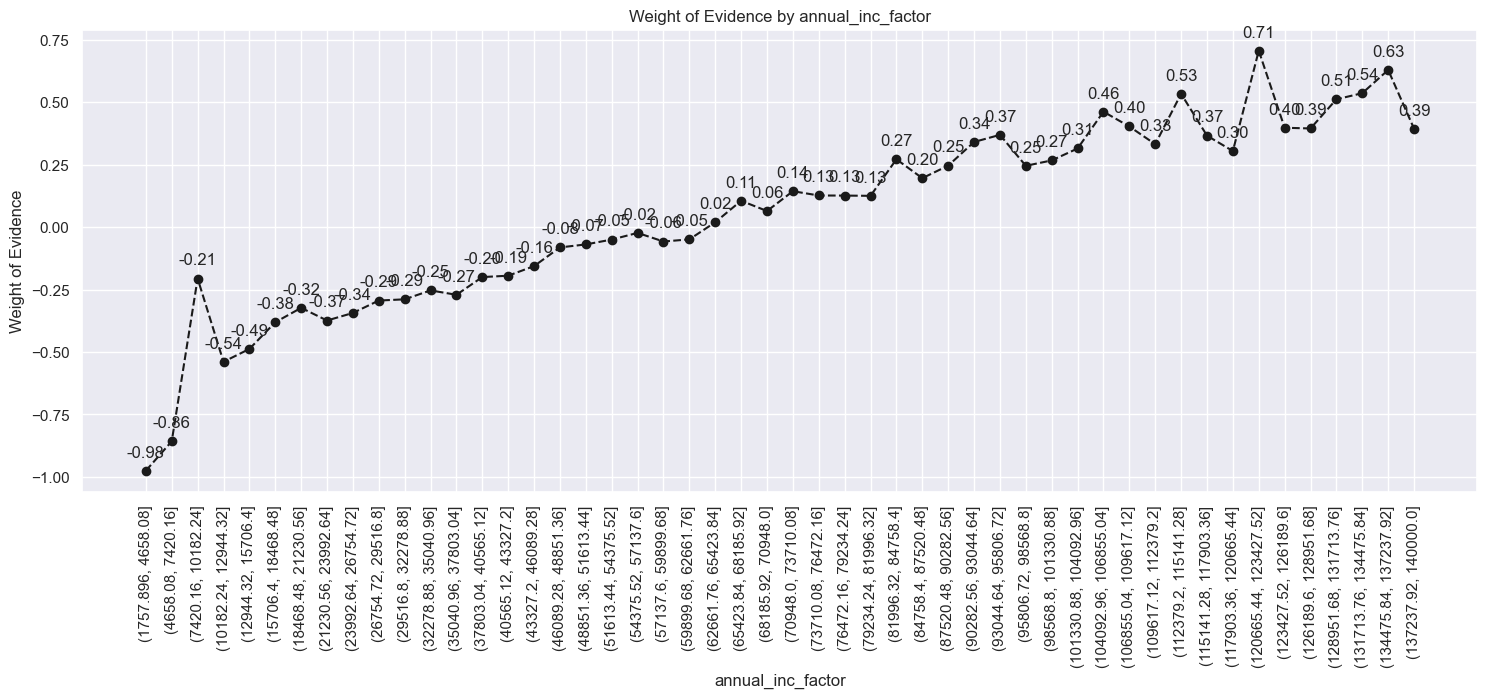

In [184]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [185]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [186]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1373989647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   5346   0.872989    0.030945   4667.0   
1                   (3.76, 7.52]  11110   0.887489    0.064309   9860.0   
2                  (7.52, 11.28]  13358   0.894520    0.077321  11949.0   
3                 (11.28, 15.04]  13104   0.889728    0.075851  11659.0   
4                  (15.04, 18.8]   9362   0.894040    0.054191   8370.0   
5                  (18.8, 22.56]  11643   0.894872    0.067394  10419.0   
6                 (22.56, 26.32]  10882   0.897813    0.062989   9770.0   
7                 (26.32, 30.08]  10584   0.893896    0.061264   9461.0   
8                 (30.08, 33.84]   7565   0.900991    0.043789   6816.0   
9                  (33.84, 37.6]   9710   0.897425    0.056205   8714.0   
10                 (37.6, 41.36]   9341   0.890697    0.054069   8320.0   
11                (41.36, 45.12]   9258   0.894902    0.053589   8285.0   
12                (45.12, 48.88]   6518   0.894753    0.037729   5832.0   
13                (48.88, 52.64]   6471   0.887034    0.037457   5740.0   
14                 (52.64, 56.4]   6064   0.893140    0.035101   5416.0   
15                 (56.4, 60.16]   5891   0.900017    0.034099   5302.0   
16                (60.16, 63.92]   4046   0.885072    0.023420   3581.0   
17                (63.92, 67.68]   5296   0.892749    0.030655   4728.0   
18                (67.68, 71.44]   5141   0.891461    0.029758   4583.0   
19                 (71.44, 75.2]   4929   0.887604    0.028531   4375.0   
20                 (75.2, 78.96]   3371   0.892020    0.019513   3007.0   
21                (78.96, 82.72]   3526   0.887408    0.020410   3129.0   
22                (82.72, 86.48]     94   0.755319    0.000544     71.0   
23                (86.48, 90.24]     39   0.948718    0.000226     37.0   
24                 (90.24, 94.0]     23   0.956522    0.000133     22.0   
25                 (94.0, 97.76]     19   0.789474    0.000110     15.0   
26               (97.76, 101.52]     15   0.933333    0.000087     14.0   
27              (101.52, 105.28]     11   0.909091    0.000064     10.0   
28              (105.28, 109.04]      6   0.666667    0.000035      4.0   
29               (109.04, 112.8]      1   1.000000    0.000006      1.0   
30               (112.8, 116.56]      6   0.833333    0.000035      5.0   
31              (116.56, 120.32]      3   1.000000    0.000017      3.0   
32              (120.32, 124.08]      4   1.000000    0.000023      4.0   
33              (124.08, 127.84]      1   1.000000    0.000006      1.0   
34               (127.84, 131.6]      4   1.000000    0.000023      4.0   
35               (131.6, 135.36]      7   0.714286    0.000041      5.0   
36              (135.36, 139.12]      1   1.000000    0.000006      1.0   
37              (139.12, 142.88]      1   1.000000    0.000006      1.0   
38              (142.88, 146.64]      1   1.000000    0.000006      1.0   
39               (146.64, 150.4]      2   0.500000    0.000012      1.0   
40               (150.4, 154.16]      2   0.500000    0.000012      1.0   
41              (154.16, 157.92]      1   1.000000    0.000006      1.0   
42              (157.92, 161.68]      0        NaN    0.000000      NaN   
43              (161.68, 165.44]      0        NaN    0.000000      NaN   
44               (165.44, 169.2]      0        NaN    0.000000      NaN   
45               (169.2, 172.96]      1   1.000000    0.000006      1.0   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000006      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    679.0     0.030268    0.036560 -0.188867             NaN       NaN  inf  
1   1250.0     0.06

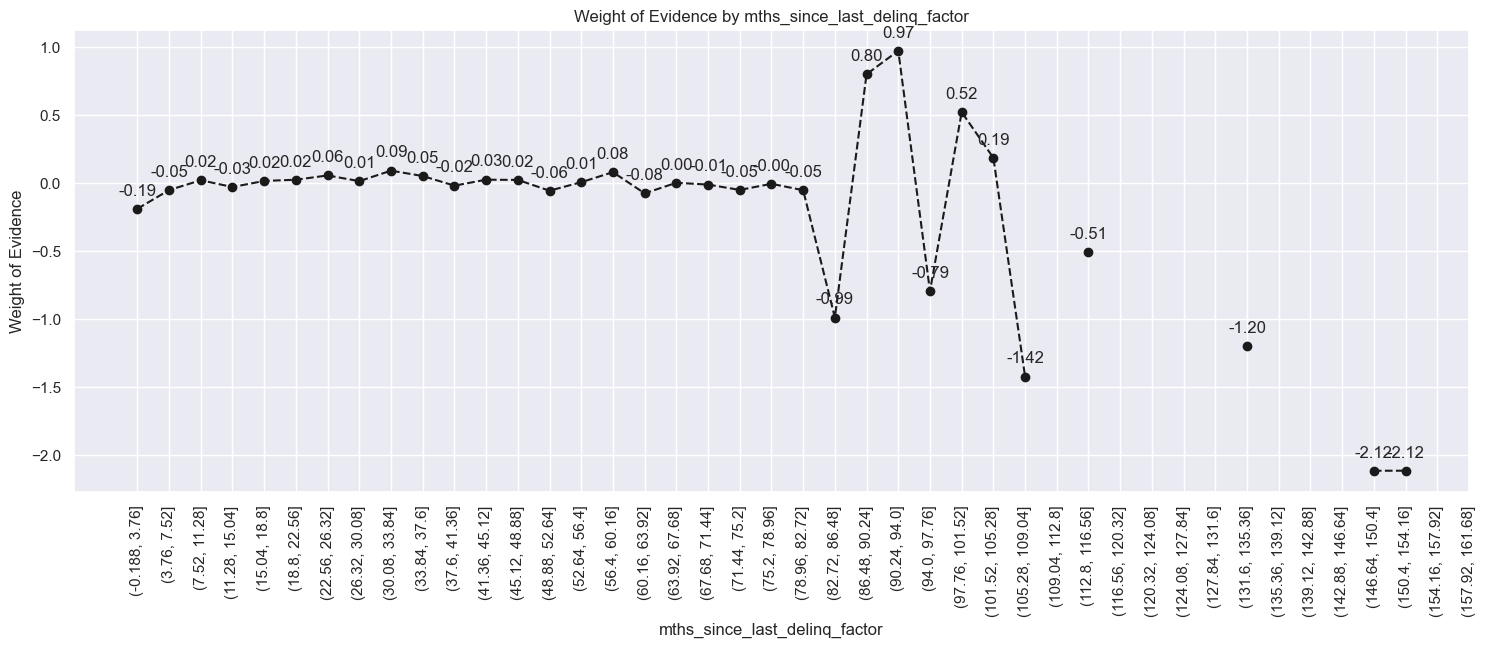

In [187]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [188]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [189]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    737   0.879240    0.001976   648.0   89.0   
1         (0.4, 0.8]    795   0.915723    0.002131   728.0   67.0   
2         (0.8, 1.2]    926   0.890929    0.002483   825.0  101.0   
3         (1.2, 1.6]   1061   0.901037    0.002844   956.0  105.0   
4         (1.6, 2.0]   1195   0.903766    0.003204  1080.0  115.0   
5       (2.0, 2.399]   1314   0.914003    0.003523  1201.0  113.0   
6     (2.399, 2.799]   1521   0.914530    0.004078  1391.0  130.0   
7     (2.799, 3.199]   1698   0.905771    0.004552  1538.0  160.0   
8     (3.199, 3.599]   1961   0.905150    0.005257  1775.0  186.0   
9     (3.599, 3.999]   2217   0.915201    0.005944  2029.0  188.0   
10    (3.999, 4.399]   2428   0.911038    0.006509  2212.0  216.0   
11    (4.399, 4.799]   2571   0.914819    0.006893  2352.0  219.0   
12    (4.799, 5.199]   2867   0.912103    0.007686  2615.0  252.0   
13    (5.199, 5.599]   3084   0.913424    0.008268  2817.0  267.0   
14    (5.599, 5.999]   3281   0.916184    0.008796  3006.0  275.0   
15    (5.999, 6.398]   3534   0.912564    0.009474  3225.0  309.0   
16    (6.398, 6.798]   3746   0.918847    0.010043  3442.0  304.0   
17    (6.798, 7.198]   3865   0.913066    0.010362  3529.0  336.0   
18    (7.198, 7.598]   4262   0.910840    0.011426  3882.0  380.0   
19    (7.598, 7.998]   4477   0.914675    0.012003  4095.0  382.0   
20    (7.998, 8.398]   4669   0.912187    0.012517  4259.0  410.0   
21    (8.398, 8.798]   4819   0.909732    0.012919  4384.0  435.0   
22    (8.798, 9.198]   5093   0.907913    0.013654  4624.0  469.0   
23    (9.198, 9.598]   5198   0.905156    0.013936  4705.0  493.0   
24    (9.598, 9.998]   5428   0.909359    0.014552  4936.0  492.0   
25   (9.998, 10.397]   5656   0.909830    0.015163  5146.0  510.0   
26  (10.397, 10.797]   5897   0.910293    0.015809  5368.0  529.0   
27  (10.797, 11.197]   6170   0.902755    0.016541  5570.0  600.0   
28  (11.197, 11.597]   6153   0.907362    0.016496  5583.0  570.0   
29  (11.597, 11.997]   6345   0.903704    0.017011  5734.0  611.0   
30  (11.997, 12.397]   6492   0.905884    0.017405  5881.0  611.0   
31  (12.397, 12.797]   6833   0.895507    0.018319  6119.0  714.0   
32  (12.797, 13.197]   6657   0.906414    0.017847  6034.0  623.0   
33  (13.197, 13.597]   6739   0.902063    0.018067  6079.0  660.0   
34  (13.597, 13.997]   6865   0.895994    0.018405  6151.0  714.0   
35  (13.997, 14.396]   6867   0.901849    0.018410  6193.0  674.0   
36  (14.396, 14.796]   7095   0.903312    0.019021  6409.0  686.0   
37  (14.796, 15.196]   6963   0.899325    0.018667  6262.0  701.0   
38  (15.196, 15.596]   6818   0.902024    0.018279  6150.0  668.0   
39  (15.596, 15.996]   7035   0.892395    0.018860  6278.0  757.0   
40  (15.996, 16.396]   6827   0.893804    0.018303  6102.0  725.0   
41  (16.396, 16.796]   6869   0.891105    0.018415  6121.0  748.0   
42  (16.796, 17.196]   7039   0.889047    0.018871  6258.0  781.0   
43  (17.196, 17.596]   6787   0.889937    0.018196  6040.0  747.0   
44  (17.596, 17.996]   6783   0.892231    0.018185  6052.0  731.0   
45  (17.996, 18.395]   6777   0.885643    0.018169  6002.0  775.0   
46  (18.395, 18.795]   6731   0.893181    0.018045  6012.0  719.0   
47  (18.795, 19.195]   6450   0.878915    0.017292  5669.0  781.0   
48  (19.195, 19.595]   6660   0.882282    0.017855  5876.0  784.0   
49  (19.595, 19.995]   6514   0.884556    0.017464  5762.0  752.0   
50  (19.995, 20.395]   6239   0.878987    0.016726  5484.0  755.0   
51  (20.395, 20.795]   6266   0.883019    0.016799  5533.0  733.0   
52  (20.795, 21.195]   6039   0.877463    0.016190  5299.0  740.0   
53  (21.195, 21.595]   6007   0.880639    0.016104  5290.0  717.0   
54  (21.595, 21.995]   5849   0.878270    0.015681  5137.0  712.0   
55  (21.995, 22.394]   5532   0.875633    0.014831  4844.0  688.0   
56  (22.394, 22.794]   5428   0.873618    0.014552  4742.0  686.0   
57  (22.

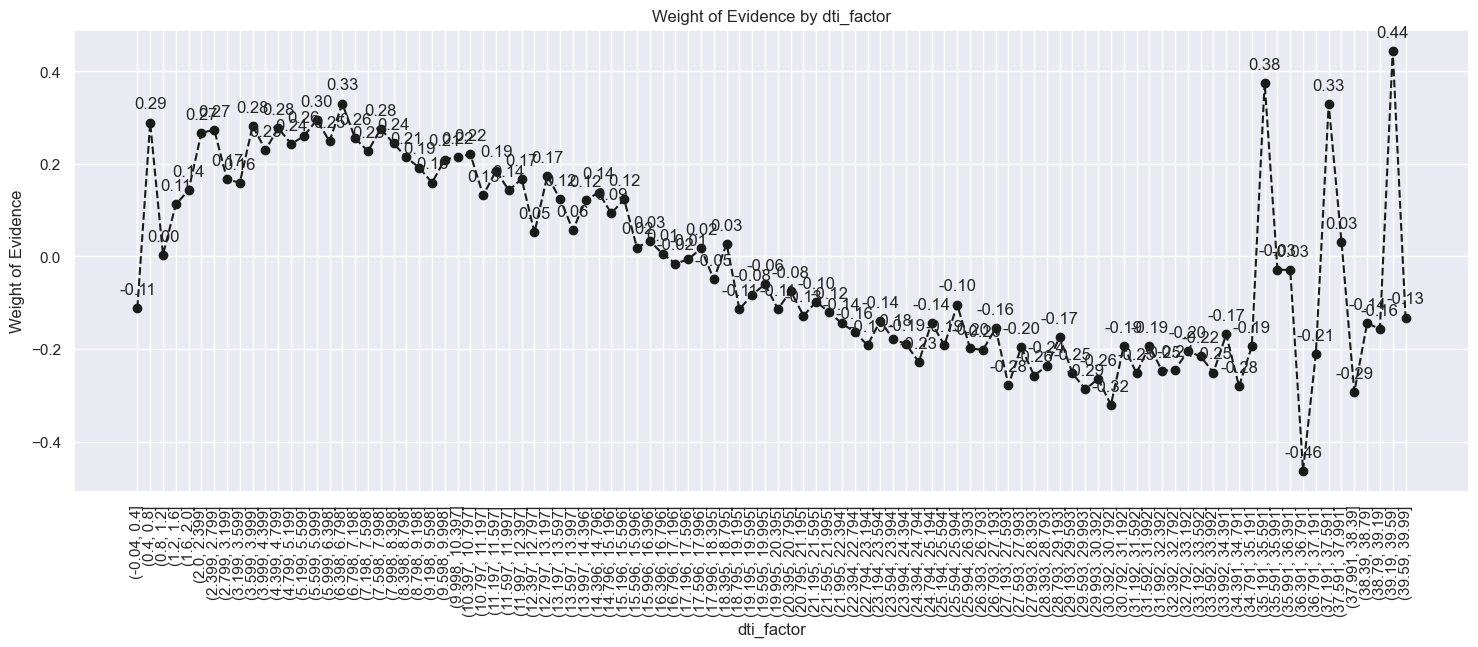

In [191]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [192]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [193]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\337294594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

dti_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0   (-0.035, 0.7]   1348   0.892433    0.003642   1203.0   145.0     0.003649   
1      (0.7, 1.4]   1668   0.893885    0.004506   1491.0   177.0     0.004523   
2      (1.4, 2.1]   2019   0.911838    0.005455   1841.0   178.0     0.005585   
3      (2.1, 2.8]   2556   0.911972    0.006905   2331.0   225.0     0.007071   
4      (2.8, 3.5]   3167   0.907799    0.008556   2875.0   292.0     0.008721   
5      (3.5, 4.2]   3853   0.912276    0.010409   3515.0   338.0     0.010663   
6      (4.2, 4.9]   4552   0.911907    0.012298   4151.0   401.0     0.012592   
7      (4.9, 5.6]   5296   0.913142    0.014308   4836.0   460.0     0.014670   
8      (5.6, 6.3]   5957   0.913715    0.016093   5443.0   514.0     0.016511   
9      (6.3, 7.0]   6458   0.916692    0.017447   5920.0   538.0     0.017958   
10     (7.0, 7.7]   7239   0.913110    0.019557   6610.0   629.0     0.020051   
11     (7.7, 8.4]   8096   0.912673    0.021872   7389.0   707.0     0.022414   
12     (8.4, 9.1]   8699   0.908495    0.023501   7903.0   796.0     0.023974   
13     (9.1, 9.8]   9193   0.907321    0.024836   8341.0   852.0     0.025302   
14    (9.8, 10.5]   9936   0.909823    0.026843   9040.0   896.0     0.027423   
15   (10.5, 11.2]  10570   0.905109    0.028556   9567.0  1003.0     0.029021   
16   (11.2, 11.9]  10808   0.906366    0.029199   9796.0  1012.0     0.029716   
17   (11.9, 12.6]  11589   0.903011    0.031309  10465.0  1124.0     0.031745   
18   (12.6, 13.3]  11677   0.901002    0.031546  10521.0  1156.0     0.031915   
19   (13.3, 14.0]  12068   0.899321    0.032603  10853.0  1215.0     0.032922   
20   (14.0, 14.7]  12247   0.902915    0.033086  11058.0  1189.0     0.033544   
21   (14.7, 15.4]  11889   0.899571    0.032119  10695.0  1194.0     0.032443   
22   (15.4, 16.1]  12139   0.897108    0.032795  10890.0  1249.0     0.033035   
23   (16.1, 16.8]  12004   0.891370    0.032430  10700.0  1304.0     0.032458   
24   (16.8, 17.5]  12289   0.888681    0.033200  10921.0  1368.0     0.033129   
25   (17.5, 18.2]  11961   0.893404    0.032314  10686.0  1275.0     0.032416   
26   (18.2, 18.9]  11705   0.885348    0.031622  10363.0  1342.0     0.031436   
27   (18.9, 19.6]  11272   0.881742    0.030452   9939.0  1333.0     0.030150   
28   (19.6, 20.3]  11242   0.880893    0.030371   9903.0  1339.0     0.030040   
29   (20.3, 21.0]  11082   0.882963    0.029939   9785.0  1297.0     0.029683   
30   (21.0, 21.7]  10398   0.879688    0.028091   9147.0  1251.0     0.027747   
31   (21.7, 22.4]   9868   0.875760    0.026659   8642.0  1226.0     0.026215   
32   (22.4, 23.1]   9358   0.872409    0.025282   8164.0  1194.0     0.024765   
33   (23.1, 23.8]   9246   0.874108    0.024979   8082.0  1164.0     0.024517   
34   (23.8, 24.5]   8781   0.870858    0.023723   7647.0  1134.0     0.023197   
35   (24.5, 25.2]   7948   0.869904    0.021472   6914.0  1034.0     0.020973   
36   (25.2, 25.9]   6906   0.874312    0.018657   6038.0   868.0     0.018316   
37   (25.9, 26.6]   6691   0.871469    0.018076   5831.0   860.0     0.017688   
38   (26.6, 27.3]   6134   0.871536    0.016572   5346.0   788.0     0.016217   
39   (27.3, 28.0]   5876   0.866406    0.015875   5091.0   785.0     0.015443   
40   (28.0, 28.7]   5638   0.863781    0.015232   4870.0   768.0     0.014773   
41   (28.7, 29.4]   5169   0.869414    0.013965   4494.0   675.0     0.013632   
42   (29.4, 30.1]   4503   0.859649    0.012165   3871.0   632.0     0.011743   
43   (30.1, 30.8]   3412   0.858441    0.009218   2929.0   483.0     0.008885   
44   (30.8, 31.5]   3250   0.866462    0.008780   2816.0   434.0     0.008542   
45   (31.5, 32.2]   2948   0.871777    0.007964   2570.0   378.0     0.007796   
46   (32.2, 32.9]   2641   0.862173    0.007135   2277.0   364.0     0.006907   
47   (32.9, 33.6]   2474   0.867421    0.006684   2146.0   328.0     0.006510   
48   (33.6, 34.3]   2371   0.869253   

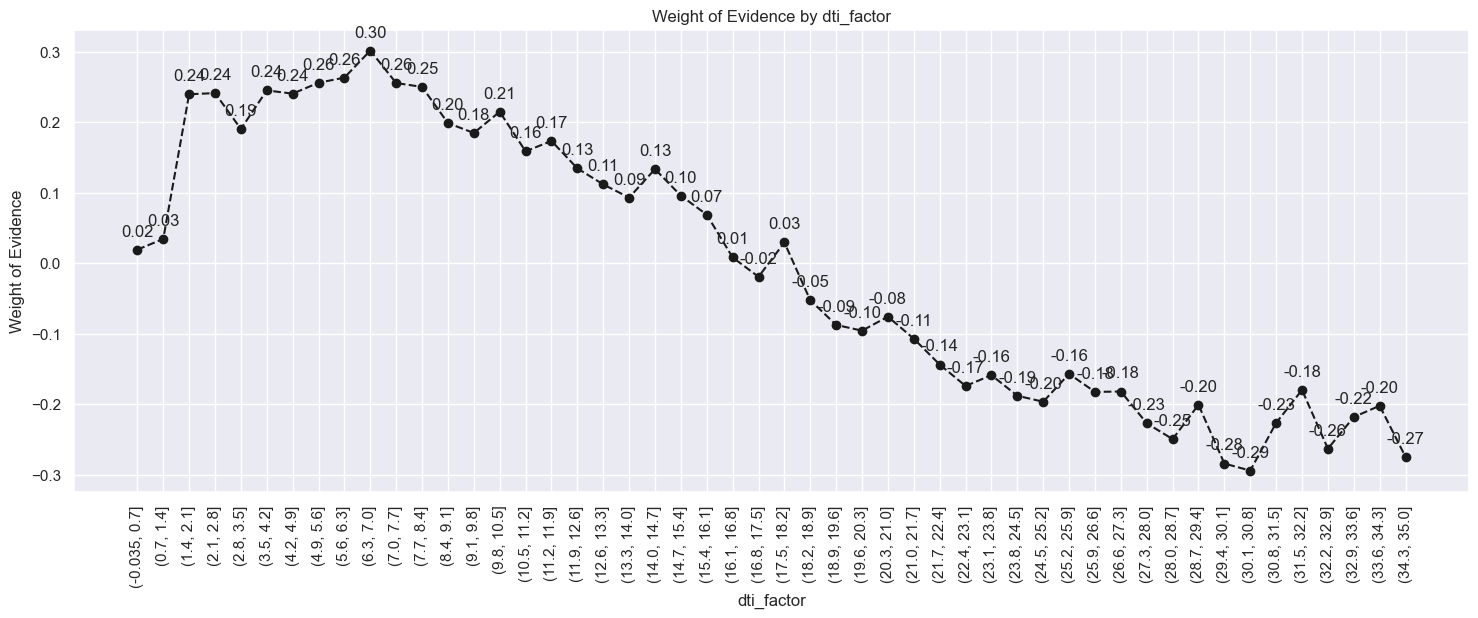

In [194]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [195]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\284476014.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\284476014.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\284476014.py:8: Performa

In [196]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\3035104871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\3035104871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1881610760.py:4: 

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.121, 2.42]   1080   0.762963    0.021518   824.0  256.0   
1                   (2.42, 4.84]     80   0.887500    0.001594    71.0    9.0   
2                   (4.84, 7.26]    181   0.911602    0.003606   165.0   16.0   
3                   (7.26, 9.68]    173   0.913295    0.003447   158.0   15.0   
4                   (9.68, 12.1]    284   0.904930    0.005658   257.0   27.0   
5                  (12.1, 14.52]    189   0.899471    0.003766   170.0   19.0   
6                 (14.52, 16.94]    196   0.923469    0.003905   181.0   15.0   
7                 (16.94, 19.36]    332   0.897590    0.006615   298.0   34.0   
8                 (19.36, 21.78]    296   0.935811    0.005897   277.0   19.0   
9                  (21.78, 24.2]    450   0.900000    0.008966   405.0   45.0   
10                 (24.2, 26.62]    364   0.909341    0.007252   331.0   33.0   
11                (26.62, 29.04]    597   0.902848    0.011895   539.0   58.0   
12                (29.04, 31.46]    458   0.910480    0.009125   417.0   41.0   
13                (31.46, 33.88]    492   0.910569    0.009803   448.0   44.0   
14                 (33.88, 36.3]    765   0.912418    0.015242   698.0   67.0   
15                 (36.3, 38.72]    662   0.939577    0.013190   622.0   40.0   
16                (38.72, 41.14]   1002   0.919162    0.019964   921.0   81.0   
17                (41.14, 43.56]    800   0.920000    0.015939   736.0   64.0   
18                (43.56, 45.98]    798   0.924812    0.015899   738.0   60.0   
19                 (45.98, 48.4]   1355   0.925461    0.026997  1254.0  101.0   
20                 (48.4, 50.82]    968   0.924587    0.019286   895.0   73.0   
21                (50.82, 53.24]   1526   0.918087    0.030404  1401.0  125.0   
22                (53.24, 55.66]   1087   0.910764    0.021657   990.0   97.0   
23                (55.66, 58.08]   1660   0.920482    0.033074  1528.0  132.0   
24                 (58.08, 60.5]   1111   0.909091    0.022135  1010.0  101.0   
25                 (60.5, 62.92]   1200   0.913333    0.023909  1096.0  104.0   
26                (62.92, 65.34]   1661   0.910897    0.033094  1513.0  148.0   
27                (65.34, 67.76]   1097   0.928897    0.021857  1019.0   78.0   
28                (67.76, 70.18]   1538   0.912224    0.030643  1403.0  135.0   
29                 (70.18, 72.6]    998   0.898798    0.019884   897.0  101.0   
30                 (72.6, 75.02]   1419   0.902748    0.028272  1281.0  138.0   
31                (75.02, 77.44]    934   0.899358    0.018609   840.0   94.0   
32                (77.44, 79.86]    946   0.906977    0.018848   858.0   88.0   
33                (79.86, 82.28]   1367   0.891002    0.027236  1218.0  149.0   
34                 (82.28, 84.7]    720   0.900000    0.014345   648.0   72.0   
35                 (84.7, 87.12]   1356   0.856932    0.027017  1162.0  194.0   
36                (87.12, 89.54]    845   0.876923    0.016836   741.0  104.0   
37                (89.54, 91.96]    909   0.862486    0.018111   784.0  125.0   
38                (91.96, 94.38]   1486   0.862046    0.029607  1281.0  205.0   
39                 (94.38, 96.8]   1135   0.851982    0.022614   967.0  168.0   
40                 (96.8, 99.22]   1794   0.880713    0.035743  1580.0  214.0   
41               (99.22, 101.64]   1277   0.862960    0.025443  1102.0  175.0   
42              (101.64, 104.06]   2110   0.876303    0.042039  1849.0  261.0   
43              (104.06, 106.48]   1517   0.878049    0.030225  1332.0  185.0   
44               (106.48, 108.9]   1569   0.876992    0.031261  1376.0  193.0   
45               (108.9, 111.32]   2261   0.879257    0.045048  1988.0  273.0   
46              (111.32, 113.74]   1456   0.876374    0.029009  1276.0  180.0   
47              (113.74, 116.16]   2075   0.877590    0.041342  1821.0  254.0   
48              (116.16, 118.58]  

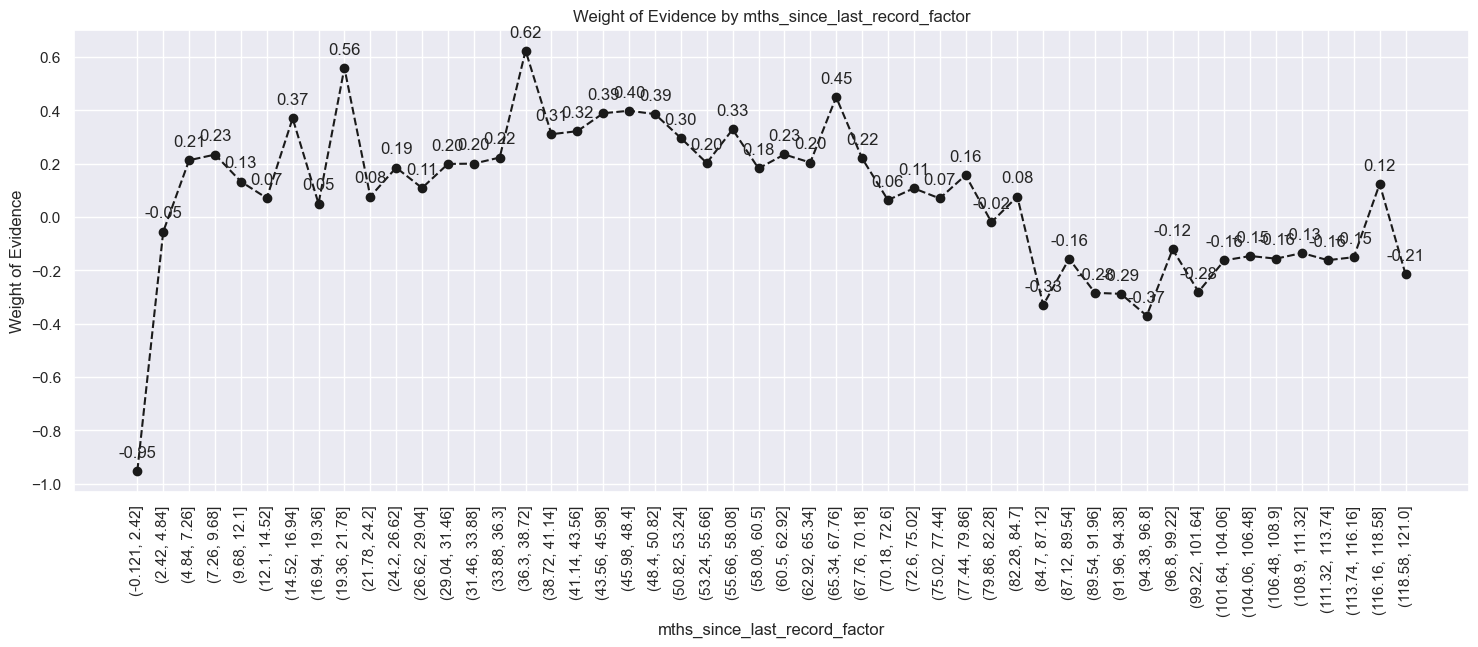

In [197]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [198]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1059239224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
C:\Users\dcgzb\AppData\Local\Temp\ipykernel_10772\1059239224.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
C:\Users\dcgzb\AppData\

In [199]:
#####
X_train = df_inputs_prepr
#####
# loan_data_inputs_test = df_inputs_prepr

In [201]:
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

#### Preprocessing the Test Dataset